<a href="https://colab.research.google.com/github/crisgonzalez1970/electro/blob/main/tendencias_electro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OBJETIVOS:
Análisis comparativo de consumo de materiales por flota

In [ ]:
# manejo de datos
import numpy as np
import pandas as pd

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
# configuracion de seaborn
sns.set(style='white', palette='inferno')

# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# transformación
from sklearn.preprocessing import MinMaxScaler

# metricas
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Estadístico, limpieza y tratamiento


## 1. Carga de datos

In [ ]:
# manejo de datos
import numpy as np
import pandas as pd

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
# configuracion de seaborn
sns.set(style='white', palette='inferno')

In [ ]:
# read data

data = pd.read_csv("https://raw.githubusercontent.com/crisgonzalez1970/Operaciones/main/consumos245.csv",sep=";")
# contar datos perdidos
print(f"Cantidad de filas: {len(data)}")
print(data.isna().sum())
data.head()

Cantidad de filas: 76069
Planta                     0
Fecha Aplicada             0
Articulo                   0
DescArt                    0
Grupo                  71693
Cantidad                   0
Unidad Medida              0
Almacen                   75
Creado                    46
Un                      2850
PPU                     6419
Mantenimiento              0
Mes                        0
Marca                   6422
TipoBus                 6422
Busqueda                   0
Empresa                    0
OT Unica Correctivo        0
PrecUnd                    0
Coste                      0
CatUso                     0
CatPlan                    0
dtype: int64


,Planta,Fecha Aplicada,Articulo,DescArt,Grupo,Cantidad,Unidad Medida,Almacen,Creado,Un,...,Mes,Marca,TipoBus,Busqueda,Empresa,OT Unica Correctivo,PrecUnd,Coste,CatUso,CatPlan
0,ALCON,02-01-2024,1CV44084001N,VCS-2 COOLANT READY MIX 40/60,NaN,-28,l,CONDELL,02-01-2024,UN200,...,1,VOLVO,C2,C2-VOLVO,Alfa,1,"3916,29","-109656,12",CHASIS,CORRECTIVO
1,ALCON,02-01-2024,0BM05021001N,FILTRO DEF DD13-15 SNP.C (ADBLUE),NaN,-1,pcs,CONDELL,02-01-2024,UN200,...,1,MERCEDES BENZ,B2,B2-MERCEDES BENZ,Alfa,1,"25960,92","-25960,92",CHASIS,CORRECTIVO
2,ALCON,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,NaN,"-0,05",kg,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,1,3418,"-170,9",CHASIS,PREVENTIVO
3,ALCON,02-01-2024,0CV01001001N,FILTRO SECADOR DE AIRE,NaN,-1,pcs,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,3,"61088,65","-61088,65",INSUMO,PREVENTIVO
4,ALCON,02-01-2024,1CV44084001N,VCS-2 COOLANT READY MIX 40/60,NaN,-5,l,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,5,"3916,29","-19581,45",CHASIS,PREVENTIVO


In [ ]:
# prompt: en la columna "Grupo", reemplazar los NaN por "Otros"

# Reemplazar NaN en la columna "Grupo" por "Otros"
data['Grupo'].fillna('Otros', inplace=True)
data['Fecha Aplicada'].fillna('01-01-2024', inplace=True)
data['Un'].fillna('0000', inplace=True)
data['PPU'].fillna('000000', inplace=True)
data['Marca'].fillna('Otro', inplace=True)
data['TipoBus'].fillna('E', inplace=True)
data['Almacen'].fillna('000', inplace=True)
data['Creado'].fillna('01-01-2024', inplace=True)
# Verificar los cambios (opcional)
print(data['Grupo'].unique())
print(data.isna().sum())

['Otros' 'Freno' 'Bateria' 'Varilla Suspension' 'Amortiguador' 'BARRA']
Planta                 0
Fecha Aplicada         0
Articulo               0
DescArt                0
Grupo                  0
Cantidad               0
Unidad Medida          0
Almacen                0
Creado                 0
Un                     0
PPU                    0
Mantenimiento          0
Mes                    0
Marca                  0
TipoBus                0
Busqueda               0
Empresa                0
OT Unica Correctivo    0
PrecUnd                0
Coste                  0
CatUso                 0
CatPlan                0
dtype: int64


<ipython-input-6-6814744e0373>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Grupo'].fillna('Otros', inplace=True)
<ipython-input-6-6814744e0373>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
# prompt: aplicar valor absoluto a las columnas cantidad y coste

# ... (your existing code)

# Aplicar valor absoluto a las columnas 'Cantidad' y 'Coste'
data['Cantidad'] = data['Cantidad'].abs()
data['Coste'] = data['Coste'].abs()

TypeError: bad operand type for abs(): 'str'

In [ ]:
data.head()

,Planta,Fecha Aplicada,Articulo,DescArt,Grupo,Cantidad,Unidad Medida,Almacen,Creado,Un,...,Mes,Marca,TipoBus,Busqueda,Empresa,OT Unica Correctivo,PrecUnd,Coste,CatUso,CatPlan
0,ALCON,02-01-2024,1CV44084001N,VCS-2 COOLANT READY MIX 40/60,Otros,-28,l,CONDELL,02-01-2024,UN200,...,1,VOLVO,C2,C2-VOLVO,Alfa,1,"3916,29","-109656,12",CHASIS,CORRECTIVO
1,ALCON,02-01-2024,0BM05021001N,FILTRO DEF DD13-15 SNP.C (ADBLUE),Otros,-1,pcs,CONDELL,02-01-2024,UN200,...,1,MERCEDES BENZ,B2,B2-MERCEDES BENZ,Alfa,1,"25960,92","-25960,92",CHASIS,CORRECTIVO
2,ALCON,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,Otros,"-0,05",kg,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,1,3418,"-170,9",CHASIS,PREVENTIVO
3,ALCON,02-01-2024,0CV01001001N,FILTRO SECADOR DE AIRE,Otros,-1,pcs,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,3,"61088,65","-61088,65",INSUMO,PREVENTIVO
4,ALCON,02-01-2024,1CV44084001N,VCS-2 COOLANT READY MIX 40/60,Otros,-5,l,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,5,"3916,29","-19581,45",CHASIS,PREVENTIVO


In [ ]:
# prompt: Listado total de registros unicos de la columna DescArt

# Assuming your dataframe is named 'data' as in your provided code.
unique_desc_art = data['DescArt'].unique()
print(f"Listado total de registros únicos de la columna DescArt:\n{unique_desc_art}")
print(f"\nTotal de registros únicos: {len(unique_desc_art)}")

Listado total de registros únicos de la columna DescArt:
['VCS-2 COOLANT READY MIX 40/60' 'FILTRO DEF DD13-15 SNP.C (ADBLUE)'
 'GRASA MOBILUX EP2 X KG MOBILUB EP2 115054' ...
 'VALVULA NIVEL DE SUSPENSION'
 'EMPAQUETADURA DE CARTER CAJA VOITH BM EU-V / VOLVO / BM EU- VI'
 'TEVINIL NARANJO ASIENTO']

Total de registros únicos: 2257


# Análisis de costos

In [ ]:
# prompt: transformar formato de "Coste" y "Cantidad" como Entero

# ... (Your existing code)

# Convert 'Coste' and 'Cantidad' to integers, handling errors
def to_int_or_zero(value):
  try:
    return int(float(value))  # Convert to float first to handle potential decimal points
  except (ValueError, TypeError):
    return 0  # Return 0 if conversion fails

data['Coste'] = data['Coste'].apply(to_int_or_zero)
data['Cantidad'] = data['Cantidad'].apply(to_int_or_zero)

# ... (Rest of your code)

In [ ]:
# prompt: sumar para cada "Mes" todos los registros "Coste" y "Cantidad" para cada codigo de "Articulo"

# Convert 'Coste' and 'Cantidad' to integers, handling errors
def to_int_or_zero(value):
  try:
    return int(float(value))  # Convert to float first to handle potential decimal points
  except (ValueError, TypeError):
    return 0  # Return 0 if conversion fails

data['Coste'] = data['Coste'].apply(to_int_or_zero)
data['Cantidad'] = data['Cantidad'].apply(to_int_or_zero)

# Group data by 'Mes', 'Articulo', and sum 'Coste' and 'Cantidad'
cost_summary = data.groupby(['Fecha', 'Articulo'])[['Coste', 'Cantidad']].sum().reset_index()

cost_summary

KeyError: 'Fecha'

In [ ]:
# prompt:  crear nueva tabla "CostRep" con las filas de la tabla "data" cuya suma total de registros en "Coste" esten dentro de los 20 mayores totales de la tabla.

# Calculate the total cost for each 'Articulo'
cost_per_article = data.groupby('Articulo')['Coste'].sum()

# Sort the articles by total cost in descending order and get the top 20
top_20_articles = cost_per_article.sort_values(ascending=False).head(20).index

# Create the 'CostRep' table by filtering the original 'data' DataFrame
CostRep = data[data['Articulo'].isin(top_20_articles)]

# Display the 'CostRep' table (optional)
print("CostRep Table:")

CostRep Table:


In [ ]:
CostRep.head(10)

,Planta,Fecha Aplicada,Articulo,DescArt,Grupo,Cantidad,Unidad Medida,Almacen,Creado,Un,...,Mes,Marca,TipoBus,Busqueda,Empresa,OT Unica Correctivo,PrecUnd,Coste,CatUso,CatPlan
2,ALCON,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,Otros,0,kg,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,1,3418,0,CHASIS,PREVENTIVO
5,ALCON,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,Otros,0,kg,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,6,3418,0,CHASIS,PREVENTIVO
6,ALCON,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,Otros,0,kg,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,1,3418,0,CHASIS,PREVENTIVO
7,ALCON,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,Otros,0,kg,CONDELL,02-01-2024,UN200,...,1,VOLVO,A2,A2-VOLVO,Alfa,3,3418,0,CHASIS,PREVENTIVO
47,OMPAN,02-01-2024,1GN44083028N,ZF ECOFLUID X SAE 80W-90,Otros,-15,l,PIEANDINO,02-01-2024,UN700,...,1,MERCEDES BENZ,BPAL,BPAL-MERCEDES BENZ,Omega,3,2253,-33795,CHASIS,PREVENTIVO
48,OMPAN,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,Otros,0,kg,PIEANDINO,02-01-2024,UN700,...,1,MERCEDES BENZ,BPAL,BPAL-MERCEDES BENZ,Omega,4,3418,-5127,CHASIS,PREVENTIVO
64,OMPAN,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,Otros,0,kg,PIEANDINO,02-01-2024,UN700,...,1,FOTON,BE,BE-FOTON,Omega,2,3418,0,CHASIS,PREVENTIVO
88,OMPAN,02-01-2024,1GN44083028N,ZF ECOFLUID X SAE 80W-90,Otros,-13,l,PIEANDINO,02-01-2024,UN700,...,1,MERCEDES BENZ,BPAL,BPAL-MERCEDES BENZ,Omega,1,2253,-29289,CHASIS,PREVENTIVO
90,OMPAN,02-01-2024,1GN44083011N,GRASA MOBILUX EP2 X KG MOBILUB EP2 115054,Otros,0,kg,PIEANDINO,02-01-2024,UN700,...,1,MERCEDES BENZ,BPAL,BPAL-MERCEDES BENZ,Omega,4,3418,-5127,CHASIS,PREVENTIVO
113,OMJJA,02-01-2024,1GN44083024N,GRASA EJE INTERMEDIO ZF AVN-132 PARA RODAMIENT...,Otros,0,kg,AGUIRRELUCO,02-01-2024,UN600,...,1,VOLVO,B2,B2-VOLVO,Omega,1,4247,0,CHASIS,PREVENTIVO


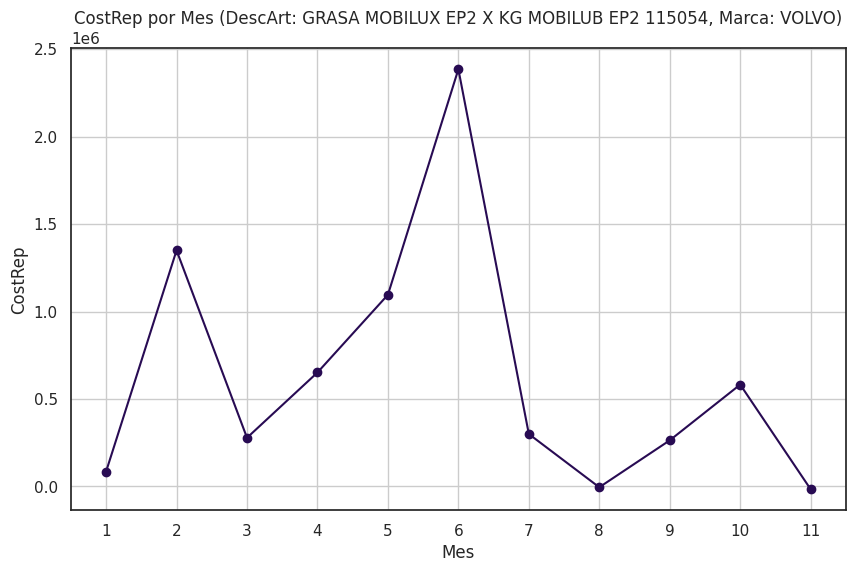

In [ ]:
# prompt: graficar CostRep por mes del registro 0 de la tabla CostRep, indicando el DescArt y Marca

import matplotlib.pyplot as plt


# Filter for the first record (index 0) - adapt if needed
first_record_data = CostRep.iloc[0]

# Get the corresponding DescArt and Marca for the first record
desc_art = first_record_data['DescArt']
marca = first_record_data['Marca']


# Group by month and sum the CostRep
monthly_cost = CostRep.groupby('Mes')['Coste'].sum()


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_cost.index, monthly_cost.values, marker='o')
plt.title(f"CostRep por Mes (DescArt: {desc_art}, Marca: {marca})")
plt.xlabel("Mes")
plt.ylabel("CostRep")
plt.xticks(monthly_cost.index)  # Ensure all months are shown on the x-axis
plt.grid(True)
plt.show()

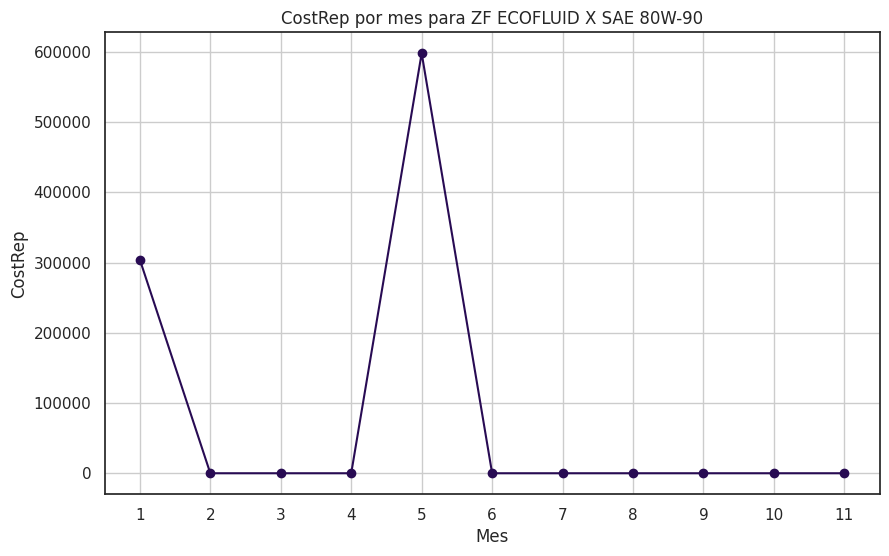

In [ ]:
# prompt: graficar CostRep por mes del registro 0 de la tabla CostRep, indicando el DescArt

import matplotlib.pyplot as plt

# Assuming 'CostRep' DataFrame is already created as in your previous code.

# Convert 'Fecha' column to datetime objects
#CostRep['Mes'] = pd.to_datetime(CostRep['Fecha'], format='%d-%m-%Y', errors='coerce')

# Extract the month from the 'Fecha' column
#CostRep['Mes'] = CostRep['Fecha'].dt.month

# Filter data for the first record (index 0)
first_record_data = CostRep.iloc[4]
desc_art = first_record_data['DescArt']

# Group by month and sum the 'Coste' for the specified 'DescArt'
monthly_cost = CostRep[CostRep['DescArt'] == desc_art].groupby('Mes')['Coste'].sum()


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_cost.index, monthly_cost.values, marker='o')
plt.xlabel('Mes')
plt.ylabel('CostRep')
plt.title(f'CostRep por mes para {desc_art}')
plt.xticks(monthly_cost.index) # Ensure all month ticks are displayed
plt.grid(True)
plt.show()

In [ ]:
# prompt: listar de menor a mayor "Coste" con las columnas ordenas por DescArt, Cantidad, Coste

# Sort the 'CostRep' DataFrame by 'Coste' in ascending order, then by 'DescArt', 'Cantidad' in descending order
CostRep_sorted = CostRep.sort_values(by=['Coste', 'DescArt', 'Cantidad'], ascending=[True, False, False])

# Display the sorted DataFrame
CostRep_sorted

,Planta,Fecha Aplicada,Articulo,DescArt,Grupo,Cantidad,Unidad Medida,Almacen,Creado,Un,...,Mes,Marca,TipoBus,Busqueda,Empresa,OT Unica Correctivo,PrecUnd,Coste,CatUso,CatPlan
35205,ALSMT,11-06-2024,1GN49105018N,MASILLA MIPA P51 X KG,Otros,-10,kg,SMARTA,11-06-2024,UN300,...,6,FOTON,BE,BE-FOTON,Alfa,1,"25573,1",-255731,INSUMO,CORRECTIVO
3412,ALCON,22-01-2024,0FT32038006N,ALETAS DEL CEPILLO DERECHO,Otros,-2,pcs,CONDELL,22-01-2024,UN200,...,1,FOTON,BE,BE-FOTON,Alfa,3,80218,-160436,CARROCERIA,CARROCERIA
3556,ALCON,23-01-2024,0FT32038006N,ALETAS DEL CEPILLO DERECHO,Otros,-2,pcs,CONDELL,23-01-2024,UN200,...,1,FOTON,BE,BE-FOTON,Alfa,3,80218,-160436,CARROCERIA,CARROCERIA
3572,ALCON,23-01-2024,0FT32038006N,ALETAS DEL CEPILLO DERECHO,Otros,-2,pcs,CONDELL,23-01-2024,UN200,...,1,FOTON,BE,BE-FOTON,Alfa,3,80218,-160436,CARROCERIA,CARROCERIA
3576,ALCON,23-01-2024,0FT32038006N,ALETAS DEL CEPILLO DERECHO,Otros,-2,pcs,CONDELL,23-01-2024,UN200,...,1,FOTON,BE,BE-FOTON,Alfa,3,80218,-160436,CARROCERIA,CARROCERIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35829,OMPAN,12-06-2024,SV222,SERVICIO REPARACIÓN E INSTALACIÓN CÁMARA INTER...,Otros,1,pcs,000,12-06-2024,UN700,...,6,MERCEDES BENZ,B2,B2-MERCEDES BENZ,Omega,11,0,436296,OTRO,CORRECTIVO
1169,OMPAN,09-01-2024,1GN44083028N,ZF ECOFLUID X SAE 80W-90,Otros,200,l,PIEANDINO,09-01-2024,UN700,...,1,MERCEDES BENZ,BPAL,BPAL-MERCEDES BENZ,Omega,12,2253,450600,CHASIS,PREVENTIVO
64361,ALCON,14-10-2024,0FT32038006N,ALETAS DEL CEPILLO DERECHO,Otros,8,pcs,CONDELL,14-10-2024,UN200,...,10,FOTON,BE,BE-FOTON,Alfa,21,80218,641744,CARROCERIA,CARROCERIA
10150,ALSMT,29-02-2024,0BM01002063N,FLEXIBLE DE REFRIGERANCION COMPRESOR,Otros,29,pcs,STA.MARTA,29-02-2024,UN300,...,2,MERCEDES BENZ,BPAL,BPAL-MERCEDES BENZ,Alfa,1,43911,1273419,CARROCERIA,CARROCERIA


In [ ]:
# prompt: listar DescArt

# Assuming your dataframe is named 'data' as in your provided code.
unique_desc_art = data['DescArt'].unique()
print(f"Listado total de registros únicos de la columna DescArt:\n{unique_desc_art}")
print(f"\nTotal de registros únicos: {len(unique_desc_art)}")

Listado total de registros únicos de la columna DescArt:
['VCS-2 COOLANT READY MIX 40/60' 'FILTRO DEF DD13-15 SNP.C (ADBLUE)'
 'GRASA MOBILUX EP2 X KG MOBILUB EP2 115054' ...
 'VALVULA NIVEL DE SUSPENSION'
 'EMPAQUETADURA DE CARTER CAJA VOITH BM EU-V / VOLVO / BM EU- VI'
 'TEVINIL NARANJO ASIENTO']

Total de registros únicos: 2257


# Análisis grupos Freno, Suspension, Baterias.
Foco en flota FOTON

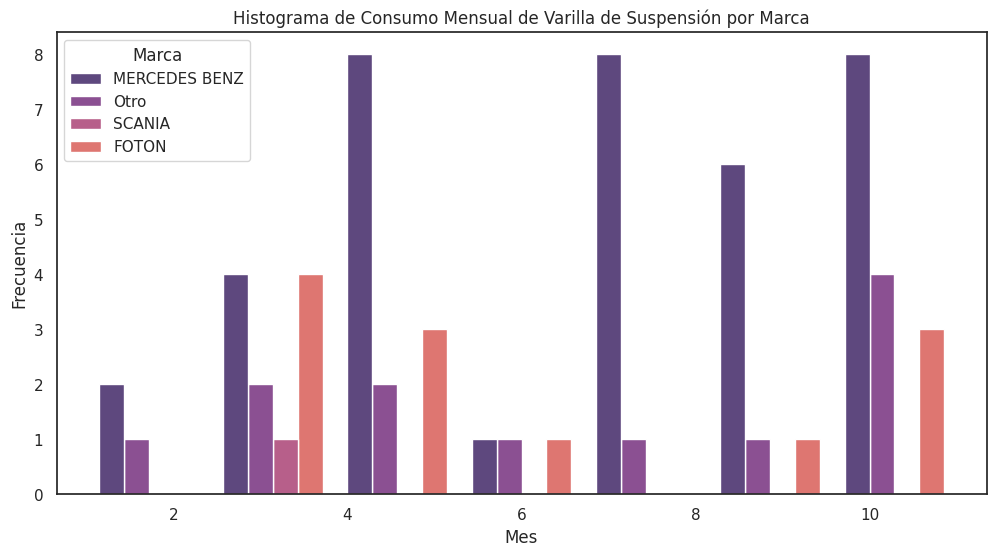

In [ ]:
# prompt: generar histograma por marca con datos mensuales de "Varilla Suspension"

# Filtrar datos para 'Varilla Suspension'
varilla_suspension = data[data['Grupo'] == 'Varilla Suspension']

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(x='Mes', hue='Marca', data=varilla_suspension, multiple="dodge", shrink=.8)
plt.title('Histograma de Consumo Mensual de Varilla de Suspensión por Marca')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

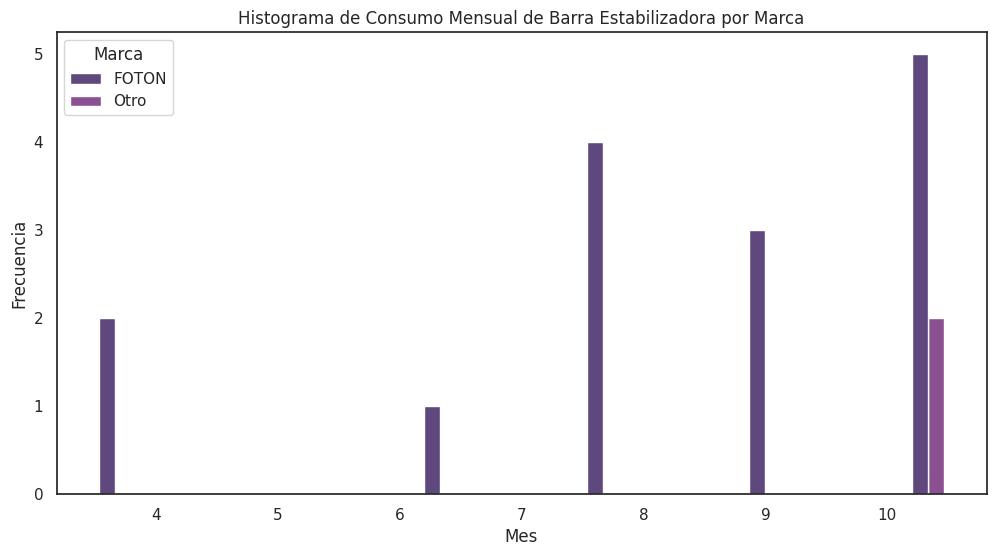

In [ ]:
# prompt: generar histograma por marca con datos mensuales de "Barras Estabilizadora"

# Filtrar datos para 'BARRA'
Barra= data[data['Grupo'] == 'BARRA']

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(x='Mes', hue='Marca', data= Barra, multiple="dodge", shrink=.2)
plt.title('Histograma de Consumo Mensual de Barra Estabilizadora por Marca')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

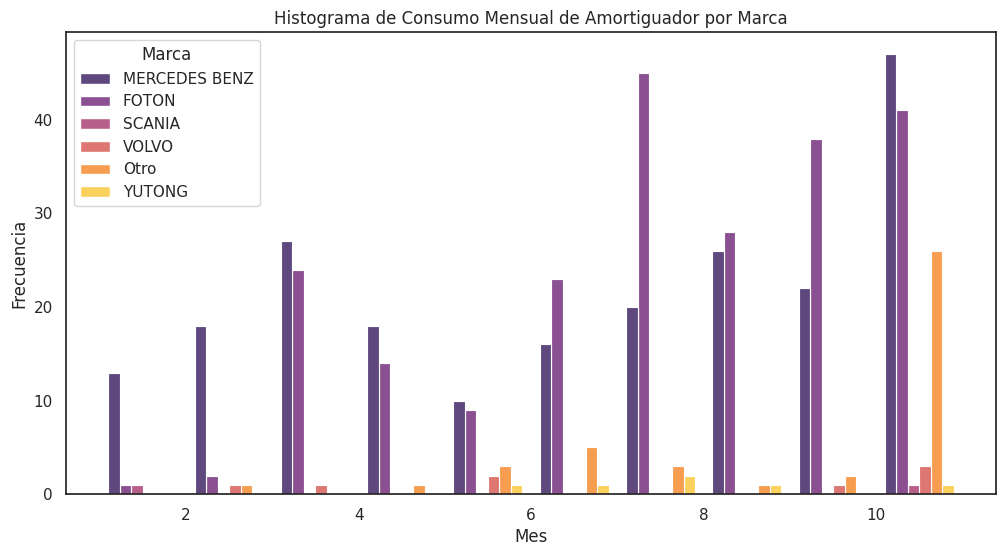

In [ ]:
# prompt: generar histograma por marca con datos mensuales de "Amortiguador"

# Filtrar datos para 'Varilla Suspension'
Amortiguador = data[data['Grupo'] == 'Amortiguador']

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(x='Mes', hue='Marca', data=Amortiguador, multiple="dodge", shrink=.8)
plt.title('Histograma de Consumo Mensual de Amortiguador por Marca')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

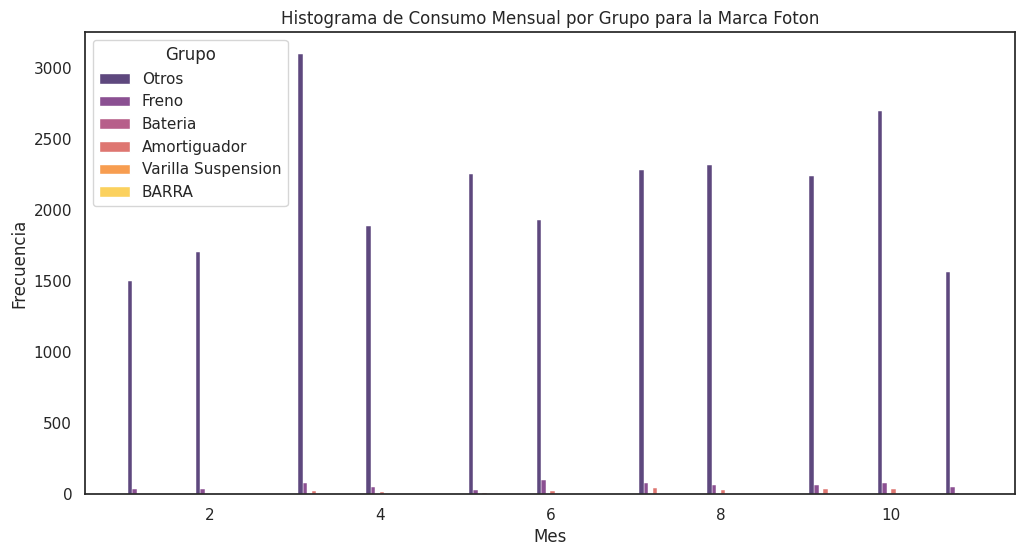

In [ ]:
# prompt: de la columna Marca, seleccionar "Foton" y generar histograma con los campos de la columna "Grupo" distribuidos por mes

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos para la marca "Foton"
foton_data = data[data['Marca'] == 'FOTON']

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(x='Mes', hue='Grupo', data=foton_data, multiple="dodge", shrink=.8)
plt.title('Histograma de Consumo Mensual por Grupo para la Marca Foton')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

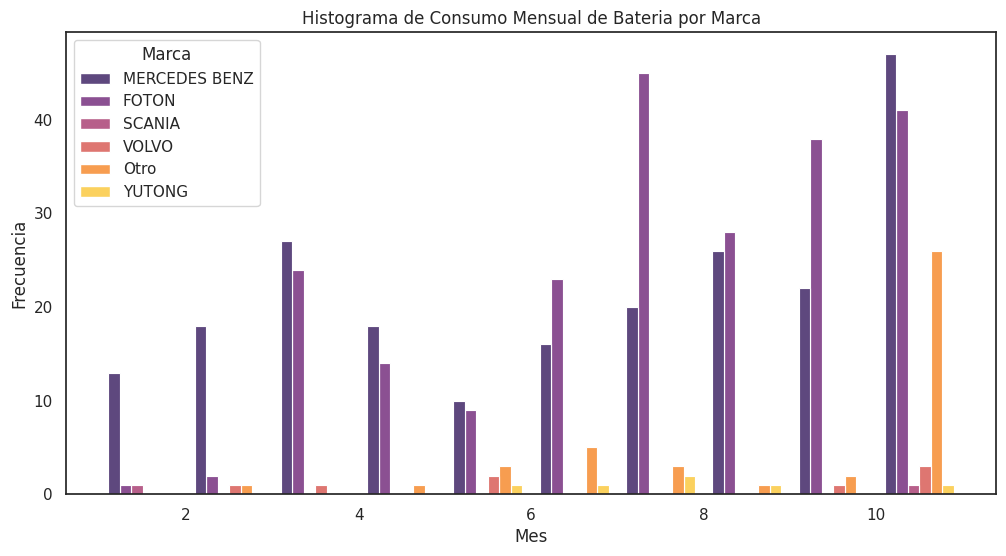

In [ ]:
# prompt: generar histograma por marca con datos mensuales de "Bateria"

# Filtrar datos para 'Bateria'
Bateria = data[data['Grupo'] == 'Bateria']

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(x='Mes', hue='Marca', data=Amortiguador, multiple="dodge", shrink=.8)
plt.title('Histograma de Consumo Mensual de Bateria por Marca')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# prompt: histograma con los registros de "suspension" por marca totalizado por "Fecha", promediando los eventos por marca

import matplotlib.pyplot as plt

# Group data by 'Fecha' and 'Marca', then count 'suspension' occurrences
suspension_counts = data2[data2['DescArt'].str.contains('suspension', case=False, na=False)] \
    .groupby(['Fecha', 'Marca'])['DescArt'].count().reset_index(name='Suspension_Count')

# Calculate the average 'suspension' events per brand for each month
average_suspension = suspension_counts.groupby(['Fecha', 'Marca'])['Suspension_Count'].mean().reset_index()

# Create the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='Fecha', y='Suspension_Count', hue='Marca', data=average_suspension)
plt.title('Average Suspension Events per Brand by Month mean')
plt.xlabel('Month')
plt.ylabel('Average Suspension Events')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

NameError: name 'data2' is not defined

In [ ]:
# prompt: histograma con los registros de "suspension" por marca totalizado por "Fecha"

# Group data by 'Fecha' and 'Marca' and count 'suspension' occurrenc
Freno_counts = data2[data2['DescArt'].str.contains('freno', case=False, na=False)].groupby(['Fecha', 'Marca'])['DescArt'].count().reset_index(name='Freno_Count')

# Create the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='Fecha', y='Freno_Count', hue='Marca', data=Freno_counts)
plt.title('Histograma de Freno por Marca y Fecha')
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Frenos')
plt.xticks(rotation=45)
plt.legend(title='Marca')
plt.tight_layout()
plt.show()

NameError: name 'data2' is not defined

In [ ]:
# prompt: histograma con los registros de "Suspension" para "Foton" totalizado por "Fecha"

# prompt: histograma con los registros de "suspension" por marca totalizado por "Fecha"

# Group data by 'Fecha' and 'Marca' and count 'suspension' occurrences
Varilla_counts = data2[data2['DescArt'].str.contains('Varilla', case=False, na=False)].groupby(['Fecha', 'Marca'])['DescArt'].count().reset_index(name='Varilla_Count')

# Create the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='Fecha', y='Varilla_Count', hue='Marca', data=Varilla_counts)
plt.title('Histograma de Varilla Suspensiones por Marca y Fecha')
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Varilla Suspensiones')
plt.xticks(rotation=45)
plt.legend(title='Marca')
plt.tight_layout()
plt.show()

NameError: name 'data2' is not defined

In [ ]:
# prompt: listar las variables de la columna descArt

print(data2['DescArt'].unique())

['PASTILLAS DE FRENO EJE DEL. Y TRASERO (EU-VI)'
 'FOCO LATERAL DIRECCION CON LAMPARA 24V AMBAR (EU-V)'
 'JUEGO PASTILLAS DE FRENO PRIMER Y TERCER EJE (C2-d)'
 'VARILLA SUSPENSION ORIGINAL     382 320 75 89     '
 'MORDAZA CALIPER O-500 BM TRASERA NUEVA' 'AMORTIGUADOR TRASERO'
 'FOCO TRASERO DE DIRECCION AMARILLO LED (BM EU-V)'
 'CALIPER TRASERO IZQUIERDO REP' 'CALIPER TRASERO DERECHO REP'
 'FOCO LATERAL DIRECCION 24V AMBAR (EU-V)'
 'CALIPER INTERMEDIO 2 EJE DERECHO BM REP'
 'CALIPER INTERMEDIO 2 EJE IZQUIERDO BM REP'
 'FUELLE SUSPENSION DELANTERO Y TRASERO (EU-VI / V)'
 'TECLA DE SUSPENSION BM EU-VI'
 'AMORTIGUADOR DELANTERO O500U CON CHAS    382 323 01 00'
 'FUELLE DE SUSPENSION DELANTERO' 'AMORTIGUADOR TRASERO FT'
 'LINTERNA DIRECCION 24V AMBAR' 'CERRADURA DE DIRECCION'
 'REP CALIPER EJE INTERMEDIO DERECHO'
 'REP CALIPER EJE INTERMEDIO IZQUIERDO'
 'CALIPER DELANTERO IZQUIERDO\xa0REP' 'CALIPER DELANTERO DERECHO REP'
 'PULMON SUSPENSION TRASERO BUS'
 'REP CALIPER DELANTERO IZQUIERDO Y

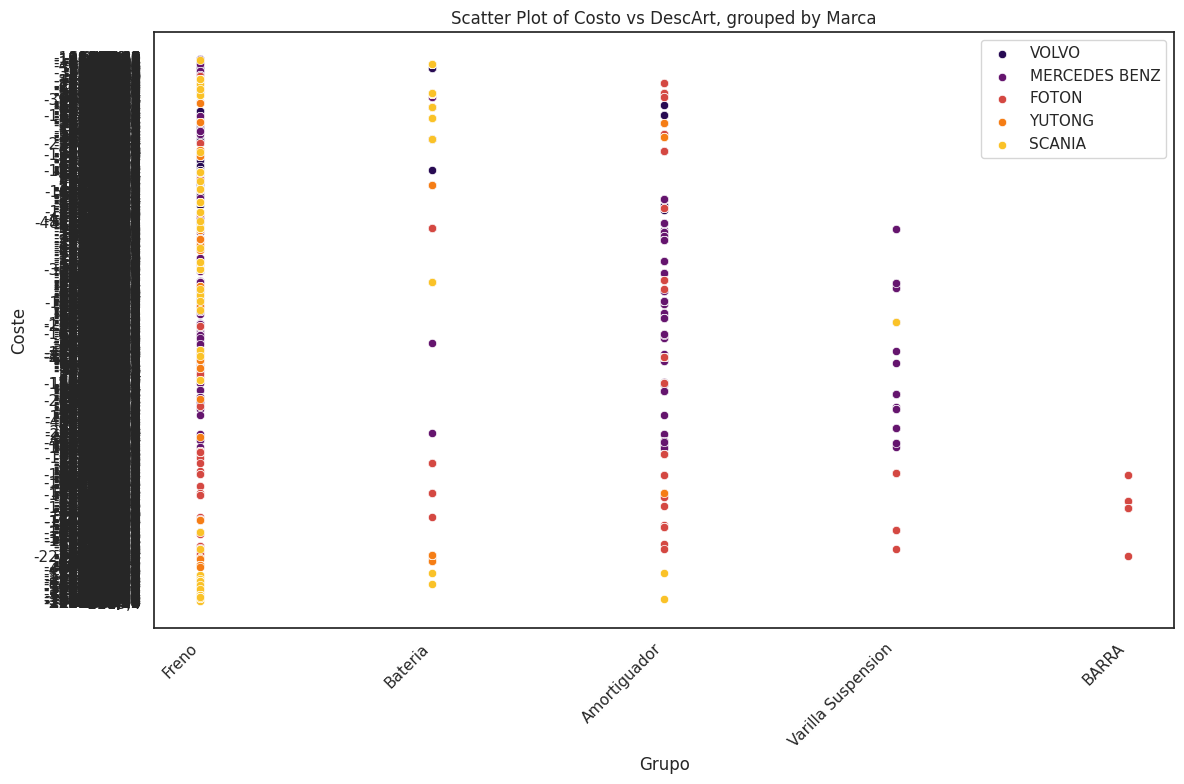

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Marca' and 'DescArt' are columns in your 'data' DataFrame.
# If not, replace them with the actual column names.

plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Iterate through unique 'Marca' values
for marca in data['Marca'].unique():
    subset = data[data['Marca'] == marca]
    # Replace 'another_column' with an actual column name from your DataFrame
    # For example, if you want to plot 'RENTA' against 'DescArt':
    sns.scatterplot(x='Grupo', y='Coste', data=subset, label=marca)

plt.xlabel('Grupo')
# Replace 'another_column' with the actual column name you used for the y-axis
plt.ylabel('Coste')
plt.title('Scatter Plot of Costo vs DescArt, grouped by Marca')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
plt.legend()
plt.tight_layout()
plt.show()

Se identifican algunos valores perdidos pero no se aprecia una cantidad relevante, en función de la cantidad de registros.

In [ ]:
data2.describe().round(2)

,Mes,OT Unica Correctivo
count,2971.00,2971.00
mean,6.22,4.25
std,3.07,8.22
min,1.00,0.00
25%,4.00,1.00
50%,6.00,2.00
75%,9.00,4.00
max,11.00,121.00


## Visualización: Primeras Observaciones

*   Se observan valores inconsistentes en la edad, como valores negativos o muy altos.

**Edad máxima**: 130 años
**Edad mínima:** -50 años

*   Se observan valores inconsistentes en la Renta.

**Renta mínima**: 176
Dependiendo de la moneda puede ser un valor esperado, incluso si es un valor que se encuentra escalado en miles, sin embargo, dada las localidades de Chile que se encuentran en la base de datos, podemos asumir que se trata de CLP, visto lo cual, se debe imputar.

Como ejemplo se entregan algunos de los salarios interprofesionales más bajos del mundo actualizados a euro 2024 para sustentar las afirmaciones antes expuestas:

*   **Myanmar:** 62 Euros
*   **Nigeria:** 64 Euros
*   **Timor oriental:** 100 Euros

## Pre Procesamiento

## Outliers

In [ ]:
# prompt: imprimir age

age = 30 # Example age, replace with actual age value
age

In [ ]:
# visualizar outliers en la edad (AGE) mediante scatterplot
sns.scatterplot(x='EDAD', y='RENTA',  hue='FUGA', data=data, palette="inferno");

ValueError: Could not interpret value `EDAD` for `x`. An entry with this name does not appear in `data`.

Se observan inconsistencias en la edad

In [ ]:
#Ordenando la renta de menor a mayor, se identifica una renta mínima de 176, lo que para niveles de ingreso en chile no correspondería

data = data.sort_values(by='RENTA')
print(data['RENTA'])

1371        176
1095        423
1019        481
1403        490
244         523
         ...   
1451    8208032
645     8208047
1717    8233967
114     8362439
2288    8454317
Name: RENTA, Length: 2294, dtype: int64


##Declarar valores perdidos o inconsistenacias

In [ ]:
# Declaramos valores inconsistentes en cada columna
data.loc[data['EDAD'] > 90, 'EDAD'] = np.nan
data.loc[data['EDAD'] < 0, 'EDAD'] = np.nan
data.loc[data['RENTA'] < 400, 'RENTA'] = np.nan

# Se dejan como NaN las edades inferiores a cero y mayores que 90, basicamente por no contar con clientes sobre 75, definimos un rango adicional para los datos de test.
# Además se considera como "poco probable" la actividad económica crediticia de clientes sobre esa edad.

# contamos valores perdidos
data.isna().sum()

,0
ID,0
GENERO,11
RENTA,1
EDAD,8
NIV_EDUC,11
E_CIVIL,11
COD_OFI,0
COD_COM,3
CIUDAD,3
D_Marzo,0


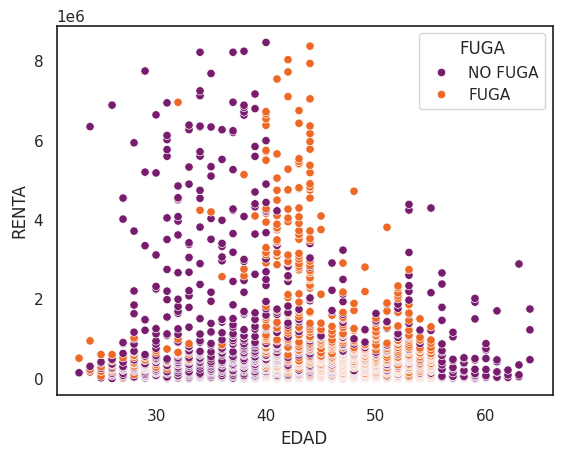

In [ ]:
# visualizar outliers en la edad mediante scatterplot
sns.scatterplot(x='EDAD', y='RENTA',  hue='FUGA', data=data, palette="inferno");

In [ ]:
data.describe().round(2)

,ID,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO
count,2294.00,2293.00,2286.00,2294.00,2291.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00
mean,1147.50,853128.08,43.56,68.54,107.95,153020.64,272681.03,103231.53,189976.06,566.85,3578.76,1940.64,1.25,3477092.41
std,662.37,1379901.20,7.99,40.16,84.77,498187.54,402325.69,870698.44,670504.23,1075.33,8942.38,9868.82,0.75,2292933.05
min,1.00,423.00,23.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500000.00
25%,574.25,101775.00,39.00,31.00,80.00,0.00,17674.25,0.00,0.00,7.00,0.00,0.00,1.00,1700000.00
50%,1147.50,370159.00,44.00,56.00,90.00,0.00,134474.50,0.00,5502.00,146.00,0.00,56.00,1.00,2600000.00
75%,1720.75,827492.00,50.00,92.00,118.00,0.00,374425.00,0.00,174906.00,629.75,1486.25,497.25,2.00,4800000.00
max,2294.00,8454317.00,64.00,155.00,516.00,9458161.00,5495534.00,18396961.00,20634612.00,11187.00,88837.00,249652.00,3.00,8000000.00


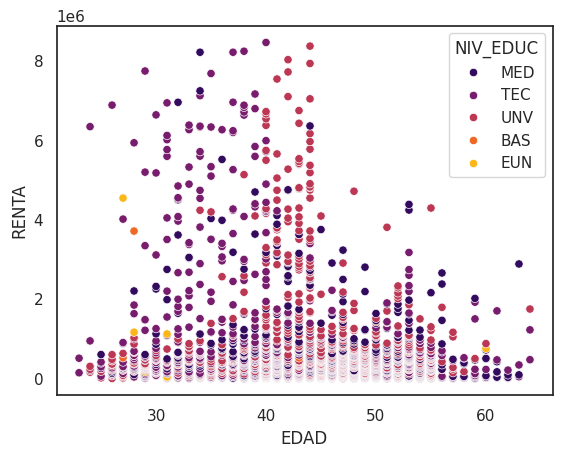

In [ ]:
# visualizar outliers en la edad mediante scatterplot
# Objeto es entender el efecto de estudios en los clientes.
sns.scatterplot(x='EDAD', y='RENTA',  hue='NIV_EDUC', data=data, palette="inferno");

## Imputación de Valores

In [ ]:
#Se imputa por eliminación la renta mínima de 176
data = data[data['RENTA'] != 176]
data = data.sort_values(by='RENTA')
data

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
1095,1096,F,423.0,38.0,TEC,SOL,71,326.0,PUNTA ARENAS,0,20517,0,151125,28,0,0,1,1800000,SI,NO FUGA
1019,1020,M,481.0,40.0,UNV,CAS,122,89.0,SANTIAGO,0,166410,0,346418,1649,20491,1181,2,1900000,SI,FUGA
1403,1404,F,490.0,42.0,MED,SOL,27,226.0,CONCEPCION,356408,169578,0,64971,434,0,0,1,3800000,SI,NO FUGA
244,245,F,523.0,59.0,TEC,SOL,55,93.0,SANTIAGO,0,781337,0,0,43,7476,68,1,4100000,NO,NO FUGA
1725,1726,M,788.0,40.0,UNV,SEP,80,86.0,SANTIAGO,0,752832,0,0,99,11199,0,2,3000000,NO,FUGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646,F,8208047.0,37.0,TEC,SOL,104,80.0,SANTIAGO,0,468248,0,0,0,0,122,0,1300000,NO,NO FUGA
1717,1718,F,8233967.0,38.0,TEC,SOL,40,67.0,VINA DEL MAR,0,374515,0,0,4525,0,10685,1,4800000,NO,NO FUGA
114,115,M,8362439.0,44.0,UNV,CAS,55,90.0,SANTIAGO,0,76703,0,758807,87,0,797,2,3200000,NO,FUGA
2288,2289,F,8454317.0,40.0,TEC,SOL,67,193.0,CHILLAN,0,20885,0,0,4,0,0,1,1600000,NO,NO FUGA


In [ ]:
# reemplazamos valores perdidos de la edad por valores promedio de la variable, siendo una variable importante.
data['EDAD'] = data['EDAD'].fillna(np.mean(data['EDAD']))
data.isna().sum()

,0
ID,0
GENERO,11
RENTA,1
EDAD,0
NIV_EDUC,11
E_CIVIL,11
COD_OFI,0
COD_COM,3
CIUDAD,3
D_Marzo,0


In [ ]:
#Eliminamos los demás valores perdidos, los cuales son:
#1.- GENERO
#2.- RENTA
#3.- NIV_EDUC
#4.- E_CIVIL
#5.- COD_COM
#6.- CIUDAD

print(f"Filas ANTES de la eliminación: {len(data)}")
data = data.dropna ()
print(f"Filas DESPUES de la eliminación: {len(data)}")
data.isna().sum()

Filas ANTES de la eliminación: 2294
Filas DESPUES de la eliminación: 2257


,0
ID,0
GENERO,0
RENTA,0
EDAD,0
NIV_EDUC,0
E_CIVIL,0
COD_OFI,0
COD_COM,0
CIUDAD,0
D_Marzo,0


Se eliminaron 34 datos, lo que corresponde a un 2,8% del total

## Otros ejemplos de Visualización de la Data

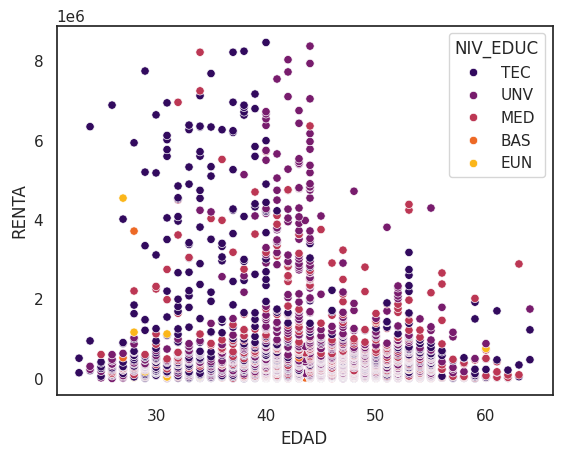

In [ ]:
# Visualización del ingreso/edad mediante scatterplox (sin valores inconsistentes)
sns.scatterplot(x='EDAD', y='RENTA',  hue='NIV_EDUC', data=data, palette="inferno");

## Transformación de Atributos

Primero se revisará la estructura de datos, distribución y estadísticos que permitan conocer su desviación para posteriormente tomar decisiones sobre su transformación

In [ ]:
# Se añade columna con el total de lo facturado (Suma de deudas por mes)
data['Suma_Mov'] = data['D_Marzo'] + data['D_Abril'] + data['D_Mayo'] + data['D_Junio'] + data['D_Julio'] + data['D_Agosto'] + data['D_Septiembre']


<ipython-input-15-2ddf29d806a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Suma_Mov'] = data['D_Marzo'] + data['D_Abril'] + data['D_Mayo'] + data['D_Junio'] + data['D_Julio'] + data['D_Agosto'] + data['D_Septiembre']


Filtro de dispersión (<18 años, que son quienes pueden contraer deuda y adquirir prestamos)

In [ ]:
# Filtras las columnas numéricas
numerical_columns = data._get_numeric_data().columns

# Excluyes varias columnas de la lista
columns_to_exclude = ['COD_COM', 'COD_OFI', 'ID']
columns_to_include = numerical_columns.difference(columns_to_exclude)

# Calculas la desviación estándar de las columnas restantes
str = data[columns_to_include].std().round(3)

# Si también quieres filtrar las filas donde 'EDAD' sea mayor a 18:
str_18 = data[data['EDAD'] > 18][columns_to_include].std().round(3)

# Imprimir los resultados
print(str)
print(str_18)



D_Abril          400131.680
D_Agosto           8964.989
D_Julio            1081.971
D_Junio          675525.802
D_Marzo          498255.953
D_Mayo           877653.098
D_Septiembre       9946.741
EDAD                  7.963
MONTO           2286519.580
M_MOROSO              0.754
RENTA           1387045.860
Suma_Mov        1325188.348
dtype: float64
D_Abril          400131.680
D_Agosto           8964.989
D_Julio            1081.971
D_Junio          675525.802
D_Marzo          498255.953
D_Mayo           877653.098
D_Septiembre       9946.741
EDAD                  7.963
MONTO           2286519.580
M_MOROSO              0.754
RENTA           1387045.860
Suma_Mov        1325188.348
dtype: float64


Se añade grafico de correlación con las variables consideradas, previamente se realizó con las variables de movimientos por cada mes pero no resultaban significativas al análisis

<Axes: >

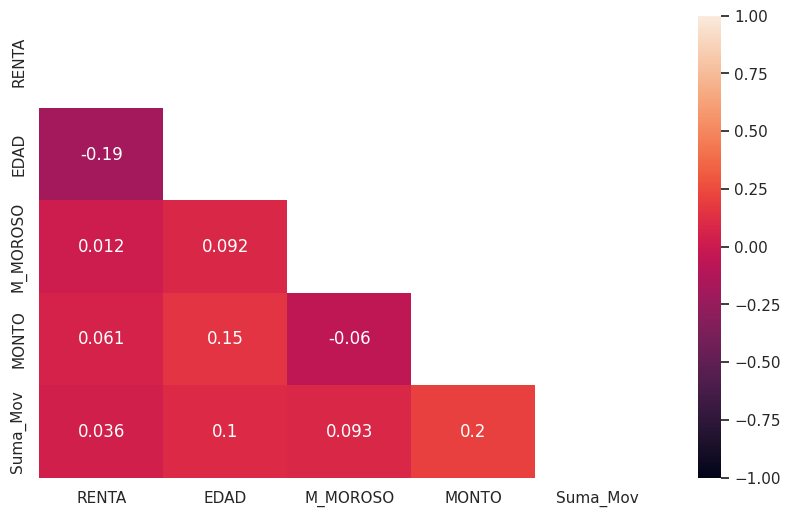

In [ ]:
# Lista de columnas a excluir para el cálculo de la correlación
columnas_a_excluir = ['FUGA', 'COD_OFI', 'COD_COM', 'ID', 'D_Marzo','D_Abril','D_Mayo','D_Junio', 'D_Julio', 'D_Agosto', 'D_Septiembre']

# Filtrar las columnas numéricas, excluyendo las que no deseas para la correlación
data_numerica = data.select_dtypes(include=[np.number]).drop(columns=columnas_a_excluir, errors='ignore')

# Calcular la matriz de correlación con las columnas restantes
corr_matrix = data_numerica.corr()

# Crear el gráfico de la matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), annot=True,  vmin=-1, vmax=1)

## Test chi-cuadrado

In [ ]:
# Definir el número de particiones para la variable numérica (edad)
bins = 6

# Construir la tabla de contingencia
variable = 'RENTA'
cut_result = pd.cut(data[variable], bins=bins)

# Extraer los límites de los intervalos y convertirlos a enteros
cut_labels = cut_result.apply(lambda x: f'[{int(x.left)}, {int(x.right)}]')

# Crear la tabla de contingencia usando las etiquetas modificadas
c_table = pd.concat([data['SEGURO'], cut_labels], axis=1).groupby([cut_labels, "SEGURO"]).size().unstack('SEGURO')

# Mostrar la tabla de contingencia
print(c_table)

SEGURO                NO   SI
RENTA                        
[-8030, 1409405]    1476  429
[1409405, 2818387]   135   18
[2818387, 4227370]    78    9
[4227370, 5636352]    52    5
[5636352, 7045334]    37    3
[7045334, 8454317]    12    3


<ipython-input-18-64ca0cdcd843>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c_table = pd.concat([data['SEGURO'], cut_labels], axis=1).groupby([cut_labels, "SEGURO"]).size().unstack('SEGURO')


In [ ]:
# Codigo para el test
from scipy.stats import chi2_contingency
# aplicamos el test
stat, p_val, dof, expected = chi2_contingency(c_table)

# interpretamos el p-value
alpha = 0.05
print(f"p-value = {round(p_val,4)} | estadístico: {round(stat,3)}")
if p_val <= alpha:
    print('Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las varibles')
else:
    print('Las variables son independientes (Acepta Hipótesis Nula) | No existe relación entre las variables')

p-value = 0.0001 | estadístico: 26.166
Las variables son dependientes (Rechaza Hipótesis Nula)  | Existe relación entre las varibles


## Kolmogorov smirnov

In [ ]:
def ecdf(data):
    # Computa la distribución empirica acumulada (ECDF por sus siglas en ingles)
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return x,y

def plot_kolmogorov(sample1, sample2,variable_name='',alpha=0.05):
  import matplotlib.pyplot as plt
  from scipy import stats
  # obtenemos la ECDF para cada muestra y las ordenamos
  x1,y1 = ecdf(sample1)
  x2,y2 = ecdf(sample2)
  # plot
  plt.figure(figsize=(6, 5))
  sns.lineplot(x=x1, y=y1, color='red')
  sns.lineplot(x=x2, y=y2, color='blue')
  # test
  stat, p_val = stats.ks_2samp(sample1, sample2)
  # interpretamos el p-value
  print(f"p-value: {round(p_val,4)} | alpha: {alpha}")
  if p_val < alpha:
      print('Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las varibles')
  else:
      print('Las distribuciones son dependientes (Acepta Hipótesis Nula) | No existe relación entre las varibles')
  plt.ylabel("Cumulative Distribution Function")
  plt.xlabel(variable_name)
  plt.show()

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las varibles


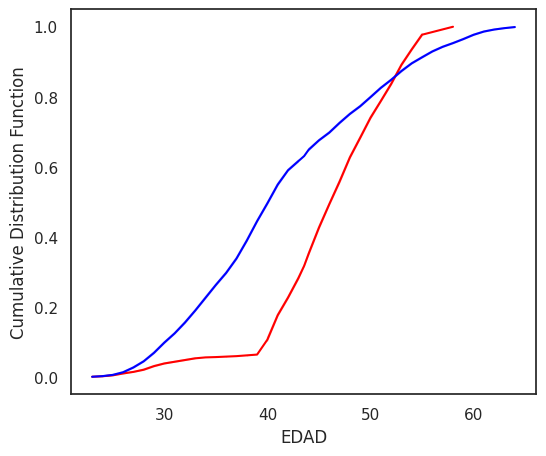

In [ ]:
# variables: 'EDAD', 'RENTA', 'D_Marzo', 'D_Abril', 'D_Junio', 'D_Julio', 'D_Agosto', 'M_Moroso', 'MONTO'
variable = 'EDAD'
plot_kolmogorov(data[data['FUGA']=="FUGA"][variable].values, data[data['FUGA']=="NO FUGA"][variable].values, variable)

## Reemplazo de variables categóricas redefiniendo sus categorías a índices numéricos

In [ ]:
# Reemplazar variables categoricas por numericas.
data['FUGA'] = data['FUGA'].replace({'NO FUGA': 0, 'FUGA': 1})
data['E_CIVIL'] = data['E_CIVIL'].replace({'SOL': 0, 'CAS': 1,'SEP': 2,'VIU': 3})
data['NIV_EDUC'] = data['NIV_EDUC'].replace({'EUN': 0, 'BAS': 1,'MED': 2, 'TEC': 3,'UNV': 4})
data['SEGURO'] = data['SEGURO'].replace({'NO': 0, 'SI': 1})
data['GENERO'] = data['GENERO'].replace({'F': 0, 'M': 1})


<ipython-input-22-5a531cb9e0f1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['FUGA'] = data['FUGA'].replace({'NO FUGA': 0, 'FUGA': 1})
<ipython-input-22-5a531cb9e0f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FUGA'] = data['FUGA'].replace({'NO FUGA': 0, 'FUGA': 1})
<ipython-input-22-5a531cb9e0f1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

| Estado de FUGA ||
|--------------|----------------|
    |``FUGA``| 1       |
    |``NO FUGA``| 0|

| Estado Civil ||
|--------------|----------------|
    |``SOL``| 0       |
    |``CAS``| 1|
     |``SEP``| 2|
      |``VIU``| 3|

| Nivel Educacional||
|--------------|----------------|
    |``EUN``| 0       |
    |``BAS``| 1|
     |``MED``| 2|
      |``TEC``| 3|
       |``UNV``| 4|

| Seguro||
|--------------|----------------|
    |``NO``| 0       |
    |``SI``| 1|


| Genero||
|--------------|----------------|
    |``F``| 0       |
    |``M``| 1|


In [ ]:
# prompt: eliminar columnas ID, CiUDAD, COD_OFI, GENERO, COD_COM variables que no aportan al analisis y no se pueden tratar.

data = data.drop(['ID','CIUDAD','COD_OFI','COD_COM'], axis=1)

data.head(10)


,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,Suma_Mov
1095,0,423.0,38.0,3,0,0,20517,0,151125,28,0,0,1,1800000,1,0,171670
1019,1,481.0,40.0,4,1,0,166410,0,346418,1649,20491,1181,2,1900000,1,1,536149
1403,0,490.0,42.0,2,0,356408,169578,0,64971,434,0,0,1,3800000,1,0,591391
244,0,523.0,59.0,3,0,0,781337,0,0,43,7476,68,1,4100000,0,0,788924
1725,1,788.0,40.0,4,2,0,752832,0,0,99,11199,0,2,3000000,0,1,764130
595,0,871.0,26.0,4,0,0,53963,0,0,0,14271,39,0,1700000,0,0,68273
1358,1,918.0,45.0,4,1,0,227463,0,0,273,0,946,3,8000000,0,1,228682
1245,0,1243.0,49.0,3,0,0,119779,0,518,0,824,0,0,8000000,1,0,121121
1343,1,1530.0,37.0,3,1,0,327321,0,0,140,0,0,2,2400000,0,0,327461
438,1,1977.0,54.0,2,1,0,0,0,0,0,0,4437,0,8000000,0,0,4437


## Otros gráficos de análisis

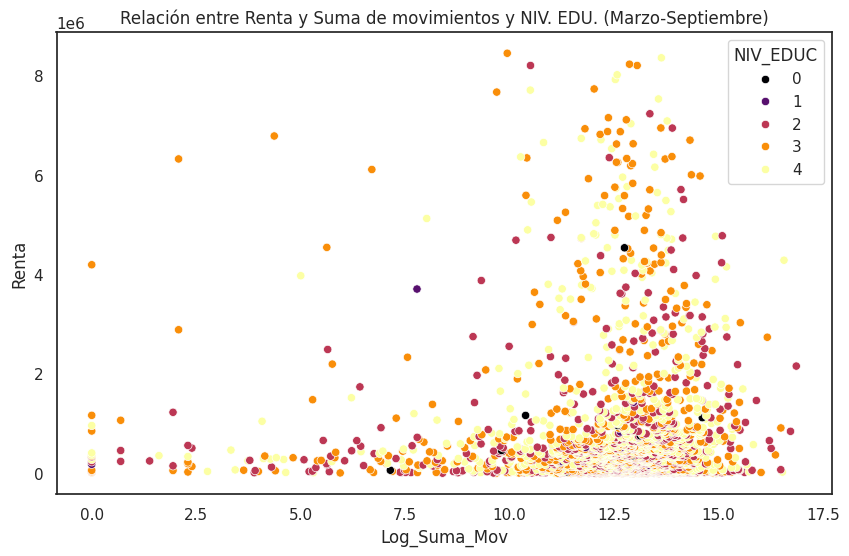

In [ ]:
#Nueva columna aplicando función logarítmica a la suma de movimientos
data['Log_Suma_Mov'] = np.log(data['Suma_Mov']+1)
# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_Suma_Mov', y='RENTA', hue='NIV_EDUC', data=data, palette='inferno')
plt.title('Relación entre Renta y Suma de movimientos y NIV. EDU. (Marzo-Septiembre)')
plt.xlabel('Log_Suma_Mov')
plt.ylabel('Renta')
plt.show()


| Nivel Educacional||
|--------------|----------------|
    |``EUN``| 0       |
    |``BAS``| 1|
     |``MED``| 2|
      |``TEC``| 3|
       |``UNV``| 4|

Análisis, Nivel universitario tiende a tener menos deuda y mas ingresos, potencial segmento objetivo.

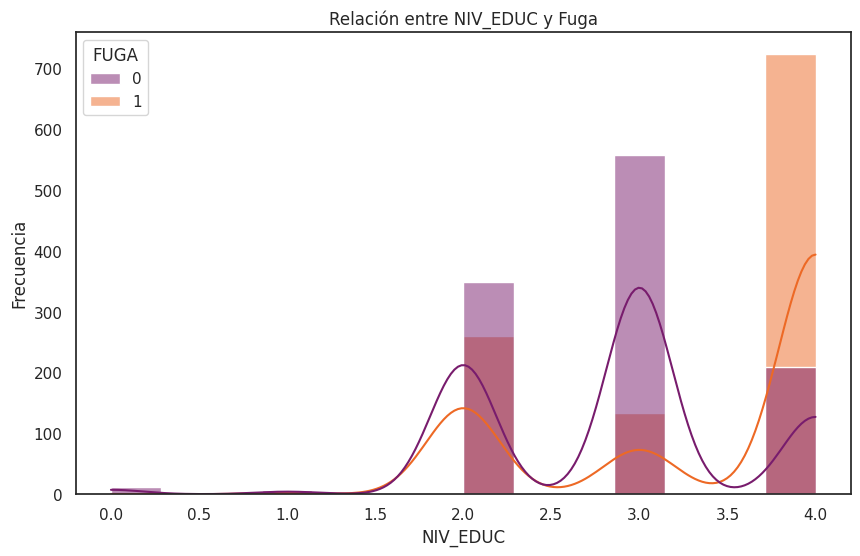

In [ ]:
# Histograma de la relación entre FUGA y NIV_EDUC
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='NIV_EDUC', hue='FUGA', kde=True, palette='inferno')
plt.title('Relación entre NIV_EDUC y Fuga')
plt.xlabel('NIV_EDUC')
plt.ylabel('Frecuencia')
plt.show()

| Nivel Educacional||
|--------------|----------------|
    |``EUN``| 0       |
    |``BAS``| 1|
     |``MED``| 2|
      |``TEC``| 3|
       |``UNV``| 4|

LA FUGA TIENDE A CONCENTRARSE MAYORITARIAMENTE EN LOS NIVELES EDUACIONALES ALTOS (UNIVERSITARIOS)

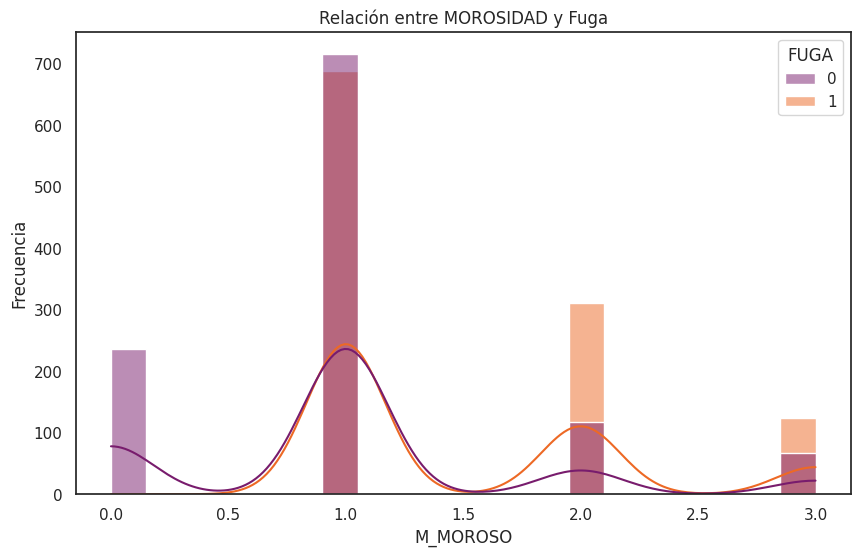

In [ ]:
# Histograma de la relación entre FUGA y NIV_EDUC
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='M_MOROSO', hue='FUGA', kde=True, palette='inferno')
plt.title('Relación entre MOROSIDAD y Fuga')
plt.xlabel('M_MOROSO')
plt.ylabel('Frecuencia')
plt.show()


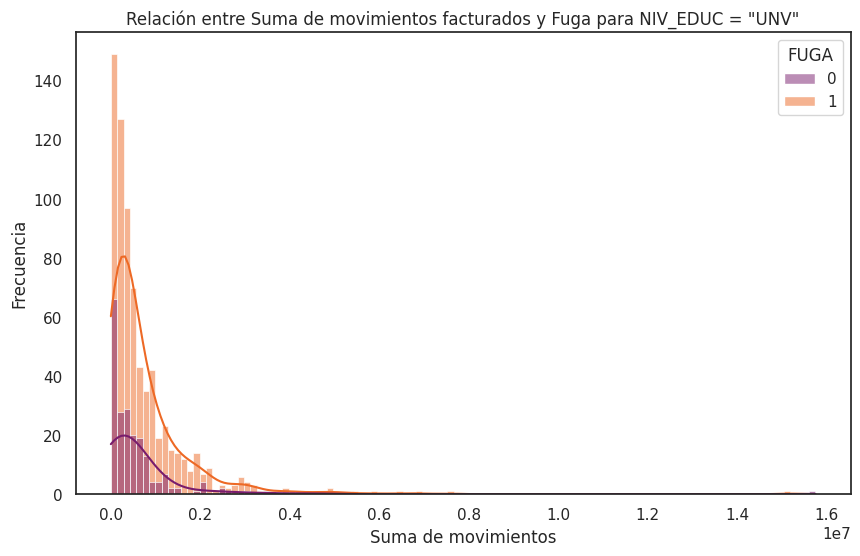

In [ ]:
# Histograma de fuga para NIV_EDUC="UNV" y Suma_Deuda
# Se verifica que la tendencia de clientes universitarios on menos deuda tienden a fugarse.
# Filtrar los datos para NIV_EDUC = UNV = 4
data_unv = data[data['NIV_EDUC'] == 4]

# Crear el histograma para Suma_Mov para NIV_EDUC = "UNV"
plt.figure(figsize=(10, 6))
sns.histplot(data=data_unv, x='Suma_Mov', hue='FUGA', kde=True, palette='inferno')
plt.title('Relación entre Suma de movimientos facturados y Fuga para NIV_EDUC = "UNV"')
plt.xlabel('Suma de movimientos')
plt.ylabel('Frecuencia')
plt.show()


De los clientes con nivel educacional universitario, mientras la suma de los montos facturados es menor, mayor es la tendencia a la fuga.

<Figure size 1000x600 with 0 Axes>

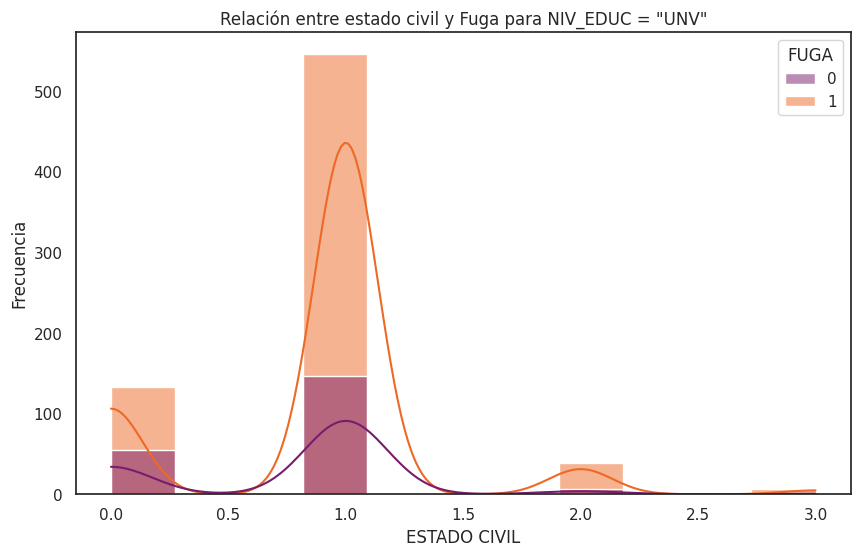

In [ ]:

# histograma para Suma_Deuda para NIV_EDUC = "UNV"
plt.figure(figsize=(10, 6))
# Histograma de fuga para NIV_EDUC="UNV" y fuga segun estado civil
# E_CIVIL' = SOL': 0, 'CAS': 1,'SEP': 2,'VIU': 3
# Filtrar los datos para NIV_EDUC = UNV = 4

data_unv = data[data['NIV_EDUC'] == 4]

# histograma para Suma_Deuda para NIV_EDUC = "UNV"
plt.figure(figsize=(10, 6))
sns.histplot(data=data_unv, x='E_CIVIL', hue='FUGA', kde=True, palette='inferno')
plt.title('Relación entre estado civil y Fuga para NIV_EDUC = "UNV"')
plt.xlabel('ESTADO CIVIL')
plt.ylabel('Frecuencia')
plt.show()

| Estado Civil ||
|--------------|----------------|
    |``SOL``| 0       |
    |``CAS``| 1|
     |``SEP``| 2|
      |``VIU``| 3|

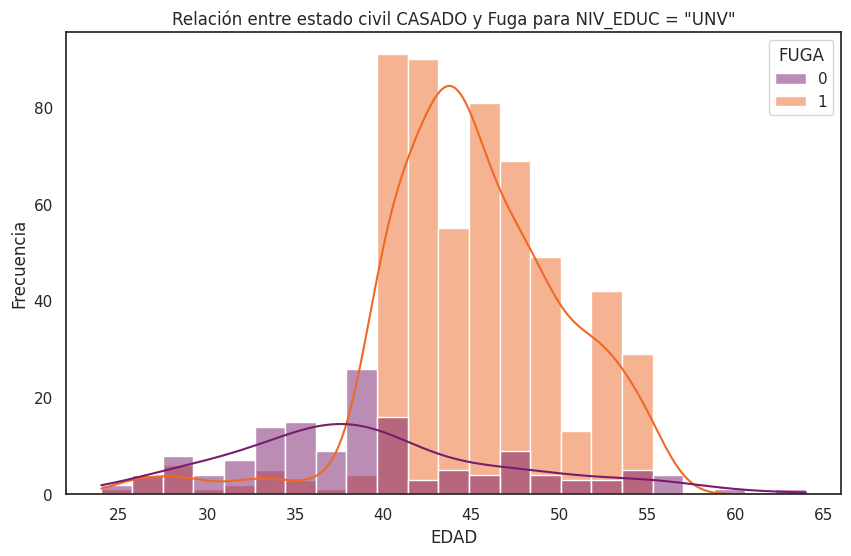

In [ ]:
# Histograma de fuga por EDAD para NIV_EDUC="UNV" y Casados
# Se verifica que la tendencia de clientes universitarios con menos deuda tienden a fugarse.
# Filtrar los datos para NIV_EDUC = UNV = 4 y estado civil casado.
data_obj = data[(data['NIV_EDUC'] == 4) & (data['E_CIVIL'] == 1)]

# Crear el histograma para Suma_Deuda para NIV_EDUC = "UNV"
plt.figure(figsize=(10, 6))
sns.histplot(data=data_obj, x='EDAD', hue='FUGA', kde=True, palette='inferno')
plt.title('Relación entre estado civil CASADO y Fuga para NIV_EDUC = "UNV"')
plt.xlabel('EDAD')
plt.ylabel('Frecuencia')
plt.show()


Clientes Universitarios entre 40 y 55 Casados.
Es el grupo mas propenso a fuga


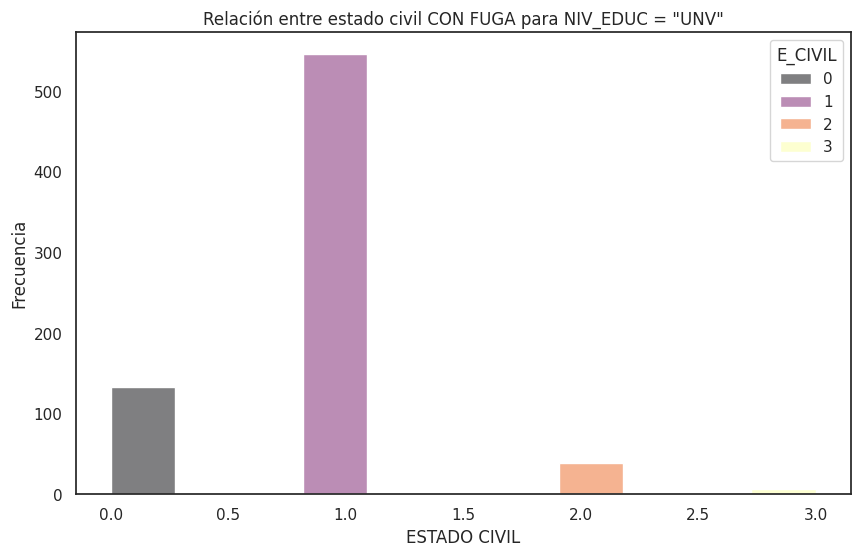

In [ ]:
# Histograma de fugaDdos por Estado civil segun edad y educacion univ.
# Se verifica que la tendencia de clientes universitarios con menos deuda tienden a fugarse.
# Filtrar los datos para NIV_EDUC = UNV = 4 y estado civil casado.
data_obj = data[(data['NIV_EDUC'] == 4) & (data['FUGA'] == 1)]

# Crear el histograma para Suma_Deuda para NIV_EDUC = "UNV"
plt.figure(figsize=(10, 6))
sns.histplot(data=data_obj, x='E_CIVIL', hue='E_CIVIL', kde=True, palette='inferno')
plt.title('Relación entre estado civil CON FUGA para NIV_EDUC = "UNV"')
plt.xlabel('ESTADO CIVIL')
plt.ylabel('Frecuencia')
plt.show()

| Estado Civil ||
|--------------|----------------|
    |``SOL``| 0       |
    |``CAS``| 1|
     |``SEP``| 2|
      |``VIU``| 3|

ENTRE LOS FUGADOS, LOS QUE TIENEN ENTRE 40 Y 55 MAYORITARIAMENTE SON CASADOS.

## Conclusión Preprocesamiento de Datos

Expuesto lo anterior se concluye lo siguiente:

**1. Se descartan las variables de:**

*   ID
*   COD_OFI
*   COD_COM

Dado que no aportan al análisis y no pueden ser tratadas mediante otros mecanismos.

**2. Existen valores inconsistentes y perdidos**

Se evidención la existencia de valores perdidos, nulos y otros inconsistentes, en las edades e ingresos principalmente.

**3. Imputaciones**

Dado que el total de valores que presentaban esta problemática no superaba el 3% se decidió imputar por eliminación.
Adicionalmente, el ingreso no se imputo por la media, como si fue el caso de la edad, dado que su desviación estándar es muy alta y estadísticos como la media se ven muy afectados por las medidas de dispersión.
Para los filtros de dispersión, únicamente se considero a personas mayores de 18 años, por efectos legales no pueden ser morosos y favorecía el análisis estadístico.

**4. Primera Hipótesis:**
Se tiene como primera hipótesis en torno a las personas que se fugan al segmento de:

*   Hombres
*   Casados
*   Universitarios
*   De edad entre los 40 y 55 años
*   Con una mora
*   En las ciudades de Arica, Concepción y Santiago.
Adicionalmente, en las dos primeras ciudades, porcentualmente, la cantidad de personas morosas es mayor que en la región metropolitana, sin embargo, solo en base al "n", Santiago es predominante por su alta densidad poblacional.

In [ ]:
#DATASET FINAL
data.head(5)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,Suma_Mov,Log_Suma_Mov
1095,0,423.0,38.0,3,0,0,20517,0,151125,28,0,0,1,1800000,1,0,171670,12.053335
1019,1,481.0,40.0,4,1,0,166410,0,346418,1649,20491,1181,2,1900000,1,1,536149,13.192169
1403,0,490.0,42.0,2,0,356408,169578,0,64971,434,0,0,1,3800000,1,0,591391,13.290234
244,0,523.0,59.0,3,0,0,781337,0,0,43,7476,68,1,4100000,0,0,788924,13.578427
1725,1,788.0,40.0,4,2,0,752832,0,0,99,11199,0,2,3000000,0,1,764130,13.546495


# 3. Minería de Datos: Entrenamiento





In [ ]:
# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# transformación
from sklearn.preprocessing import MinMaxScaler

# metricas
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
# split
#X_train, X_test, y_train, y_test = train_test_split(attributes, target, test_size=0.33, seed) -- forma general
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['FUGA'])], data['FUGA'], test_size=0.2, random_state=101) # Changed df to data

In [ ]:
print(f"Filas training: {X_train.shape[0]}")
print(f"Filas test: {X_test.shape[0]}")
X_train.head()

Filas training: 1805
Filas test: 452


,D_Abril,D_Agosto,D_Julio,D_Junio,D_Marzo,D_Mayo,D_Septiembre,EDAD,E_CIVIL,GENERO,Log_Suma_Mov,MONTO,M_MOROSO,NIV_EDUC,RENTA,SEGURO,Suma_Mov
1743,292305,0,233,0,0,0,0,39.0,1,0,12.586353,1900000,1,4,544262.0,0,292538
548,370513,0,114,292568,0,0,43,53.0,1,0,13.404891,4400000,1,4,1077214.0,0,663238
711,1356,0,1400,510823,105279,0,402,49.0,1,1,13.336282,1700000,1,4,36948.0,1,619260
363,295089,0,2,117715,0,0,189,45.0,2,1,12.931193,4200000,1,4,27839.0,0,412995
965,0,19433,1520,0,1058977,0,250,32.0,0,1,13.892639,500000,1,3,289935.0,0,1080180


In [ ]:
X_train.isna().sum()


,0
D_Abril,0
D_Agosto,0
D_Julio,0
D_Junio,0
D_Marzo,0
D_Mayo,0
D_Septiembre,0
EDAD,0
E_CIVIL,0
GENERO,0


##KNN


In [ ]:
# train
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train) # .fit() es el método que realiza el entrenamiento del modelo

In [ ]:
# predict (método para generar predicciones a partir de un modelo entrenado)
# Assuming X_test is your test data
predictions = knn.predict(X_test)
# Access the first prediction
first_prediction = predictions[0]

# Print the first prediction
print(first_prediction)

1


In [ ]:
# get accuracy
from sklearn.metrics import accuracy_score
# accuracy_score(y_true, y_pred) -- esta es tipicamente la forma en la que se entregan los valores
print(f"Accuracy train : {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy test  : {accuracy_score(y_test, knn.predict(X_test))}")
print(f"Recall train : {recall_score(y_train, knn.predict(X_train))}")
print(f"Recall test  : {recall_score(y_test, knn.predict(X_test))}")
print(f"Precision train : {precision_score(y_train, knn.predict(X_train))}")
print(f"Precision test  : {precision_score(y_test, knn.predict(X_test))}")

Accuracy train : 0.7933518005540167
Accuracy test  : 0.504424778761062
Recall train : 0.7724750277469479
Recall test  : 0.502262443438914
Precision train : 0.8055555555555556
Precision test  : 0.49333333333333335


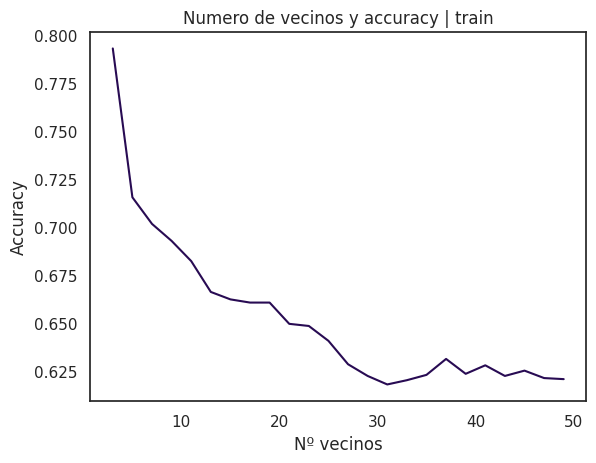

In [ ]:
# train for diferent number of neighbors
accuracies = []
neighbors = list(range(3,51,2)) # numeros impares de vecinos
for n_neighbor in neighbors:
  # train
  knn = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
  # predict y guardar accuracy
  accuracies.append(accuracy_score(y_train, knn.predict(X_train)))

# plot
plt.plot(neighbors,accuracies)
plt.title('Numero de vecinos y accuracy | train')
plt.xlabel('Nº vecinos')
plt.ylabel('Accuracy');

## Random forest


Observamos sobreajuste del modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# train for diferent number of trees
accuracie_train = []
accuracie_test = []
# numero de árboles
n_estimators = list(range(3,30,2))
for n_estimator in n_estimators:
# train
  rf = RandomForestClassifier(n_estimators=n_estimator, random_state=101, n_jobs=-1).fit(X_train,y_train)
  # predict y guardar accuracy
  accuracie_train.append(accuracy_score(y_train, rf.predict(X_train)))
  accuracie_test.append(accuracy_score(y_test, rf.predict(X_test)))

print(f"Accuracy train : {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, rf.predict(X_test))}")
print(f"Recall train : {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall test : {recall_score(y_test, rf.predict(X_test))}")
print(f"Precision train : {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision test : {precision_score(y_test, rf.predict(X_test))}")

Accuracy train : 0.9994459833795014
Accuracy test : 0.8982300884955752
Recall train : 0.9988901220865705
Recall test : 0.8914027149321267
Precision train : 1.0
Precision test : 0.8995433789954338


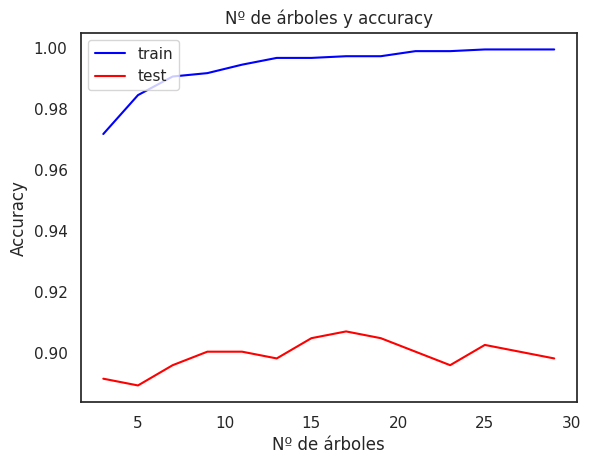

In [ ]:
# plot
plt.plot(n_estimators,accuracie_train, color='blue')
plt.plot(n_estimators,accuracie_test, color='red')
plt.title('Nº de árboles y accuracy')
plt.xlabel('Nº de árboles')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left');

## Árbol de decisión
Este modelo se ve mas lento en aprender que el anterior, pero no mejora el resutado observado con los datos de test.

Accuracy train : 0.9534626038781163
Accuracy test : 0.8893805309734514
Recall train : 0.9578246392896781
Recall test : 0.8733031674208145
Precision train : 0.9493949394939494
Precision test : 0.8976744186046511


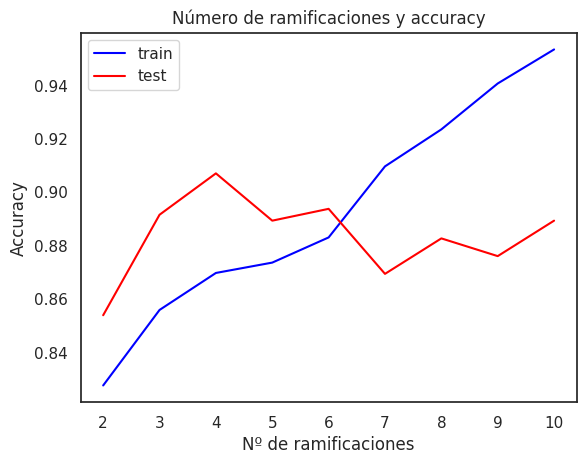

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# train for diferent number of depths
accuracie_train = []
accuracie_test = []
# numero de árboles
#depths = list(range(2,20))
depths = list(range(2,11))
for depth in depths:
  # train
  tree = DecisionTreeClassifier(random_state=101, max_depth = depth).fit(X_train,y_train)
  # predict y guardar accuracy
  accuracie_train.append(accuracy_score(y_train, tree.predict(X_train)))
  accuracie_test.append(accuracy_score(y_test, tree.predict(X_test)))

print(f"Accuracy train : {accuracy_score(y_train, tree.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, tree.predict(X_test))}")
print(f"Recall train : {recall_score(y_train, tree.predict(X_train))}")
print(f"Recall test : {recall_score(y_test, tree.predict(X_test))}")
print(f"Precision train : {precision_score(y_train, tree.predict(X_train))}")
print(f"Precision test : {precision_score(y_test, tree.predict(X_test))}")

# plot
plt.plot(depths,accuracie_train, color='blue')
plt.plot(depths,accuracie_test, color='red')
plt.title('Número de ramificaciones y accuracy')
plt.xlabel('Nº de ramificaciones')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left');

## LOGIT

In [ ]:
from sklearn.linear_model import LogisticRegression
# train
logit = LogisticRegression(random_state=101, max_iter=400).fit(X_train, y_train)
# accuracy
print(f"Accuracy train: {accuracy_score(y_train, logit.predict(X_train))}")
print(f"Accuracy test : {accuracy_score(y_test, logit.predict(X_test))}")
print(f"Recall train : {recall_score(y_train, logit.predict(X_train))}")
print(f"Recall test : {recall_score(y_test, logit.predict(X_test))}")
print(f"Recall train : {precision_score(y_train, logit.predict(X_train))}")
print(f"Recall test : {precision_score(y_test, logit.predict(X_test))}")

Accuracy train: 0.6011080332409973
Accuracy test : 0.5597345132743363
Recall train : 0.7380688124306326
Recall test : 0.7330316742081447
Recall train : 0.5787641427328112
Recall test : 0.5364238410596026


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

# Instantiate the model
tree = DecisionTreeClassifier(
    random_state=101,
    max_depth = 3,
    criterion='gini')

# Fit model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=101)

In [ ]:
# Train our selected model
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(random_state=0, max_depth = 4, criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

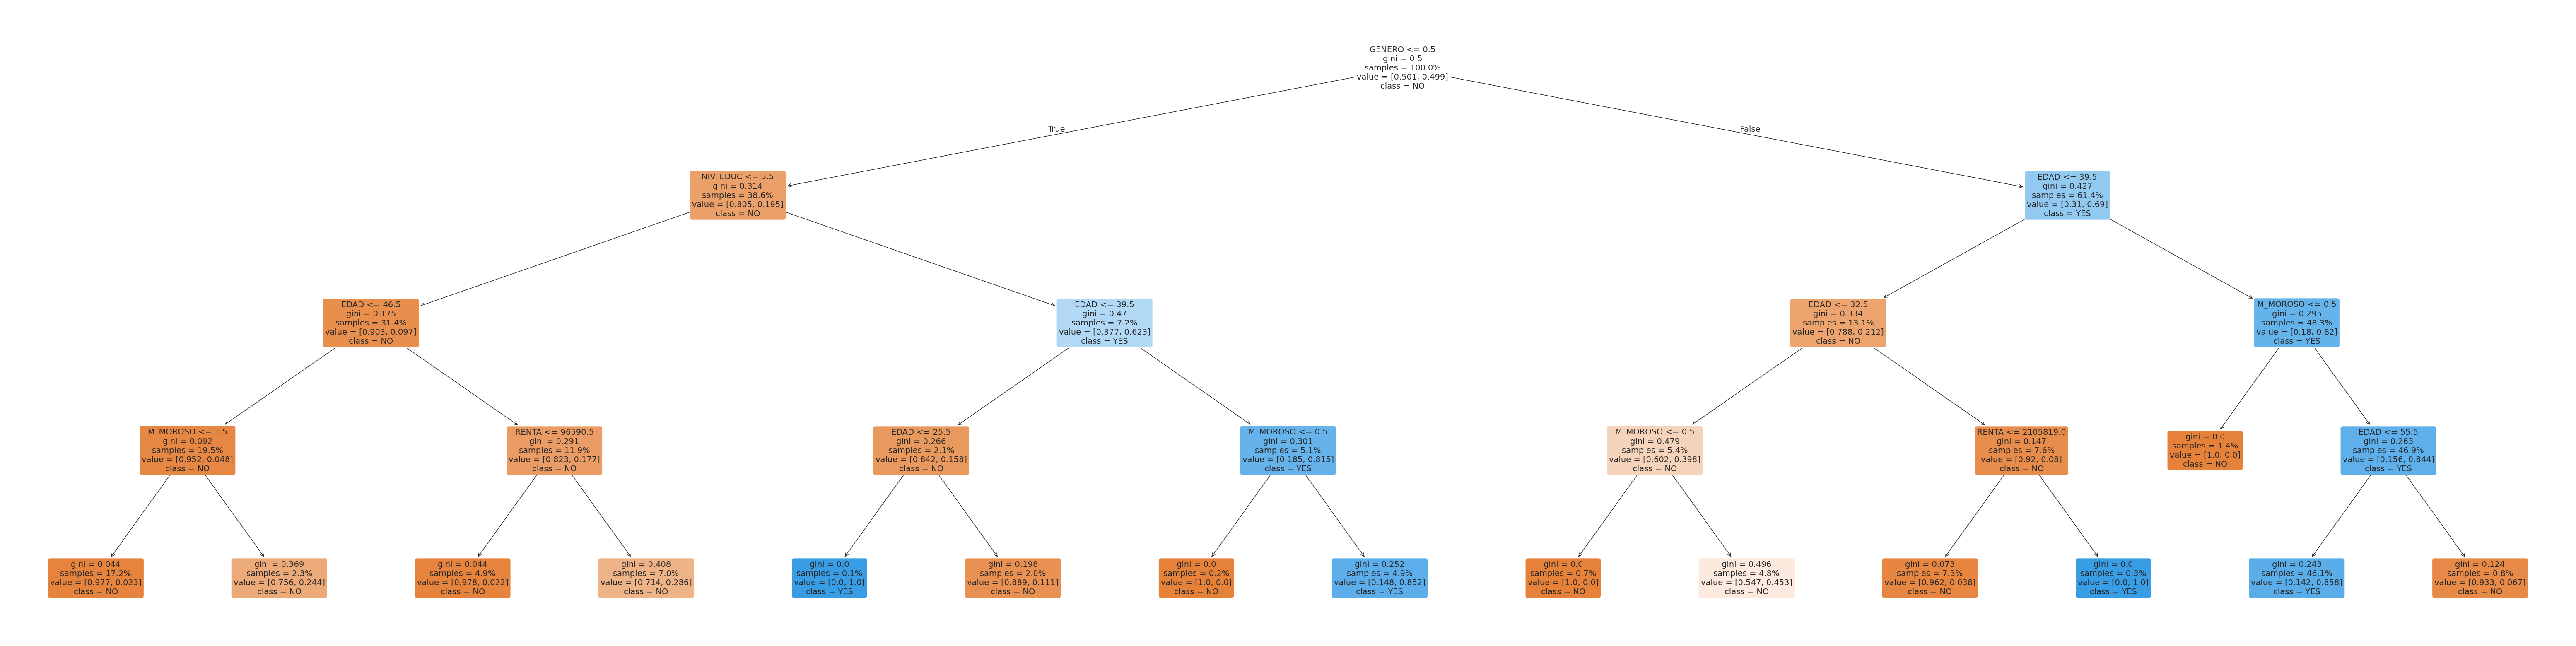

In [ ]:
# Inspect the selected trained model
plt.figure(figsize=(80, 20))
plot_tree(
    tree,
    feature_names=X_test.columns,
    class_names = ['NO', 'YES'],
    proportion=True,
    filled = True, rounded=True, fontsize=14
    );

##Conclusión de entrenamiento

1. A continuación se expresan para cada modelo, sus parámetros de entrenamiento y Testeo en conjunto a un "delta" para cada diferencia, aproximados:

*   KNN Accuracy

| Parámetro|Valor|
|------------------|----|
|``Accuracy Train``|0.62|
|``Accuracy Test`` |0.56|
|``Delta``         |-0.06|

*   KNN Recall

| Parámetro|Valor|
|------------------|----|
|``Recall Train``|0.59|
|``Recall Test`` |0.53|
|``Delta``         |-0.06|

*   KNN Precision

| Parámetro|Valor|
|------------------|----|
|``Precision Train``|0.63|
|``Precision Test`` |0.55|
|``Delta``          |-0.08|

*   RF Accuracy

| Parámetro|Valor|
|------------------|----|
|``Accuracy Train``|1|
|``Accuracy Test`` |0.9|
|``Delta``         |-0.1|

*   RF Recall

| Parámetro|Valor|
|------------------|----|
|``Recall Train``|1|
|``Recall Test`` |0.89|
|``Delta``         |-0.11|

*   RF Precision

| Parámetro|Valor|
|------------------|----|
|``Precision Train``|1|
|``Precision Test`` |0.9|
|``Delta``         |-0.1|

*   Tree Accuracy

| Parámetro|Valor|
|------------------|----|
|``Accuracy Train``|0.95|
|``Accuracy Test`` |0.89|
|``Delta``         |-0.06|

*   Tree Recall

| Parámetro|Valor|
|------------------|----|
|``Recall Train``| 0.96|
|``Recall Test`` |0.87|
|``Delta``         |-0.09|

*   Tree Precision

| Parámetro|Valor|
|------------------|----|
|``Precision Train``|0.95|
|``Precision Test`` |0.9|
|``Delta``         |-0.05|

*   Logit Accuracy

| Parámetro|Valor|
|------------------|----|
|``Accuracy Train``|0.60|
|``Accuracy Test`` |0.56|
|``Delta``         |-0.04|

*   Logit Recall

| Parámetro|Valor|
|------------------|----|
|``Recall Train``|0.74|
|``Recall Test`` |0.73|
|``Delta``         |-0.01|

*   Logit Precision

| Parámetro|Valor|
|------------------|----|
|``Precision Train``|0.58|
|``Precision Test`` |0.54|
|``Delta``         |-0.04|


Dados los modelos y parámetros conseguidos para una de las 4 opciones, se decide continuar con la clasificación con el modelo de Random Forest porque es el que presenta los menores deltas en cada resultado.
Adicionalmente, para el caso del Árbol de Decisión, se observa un sobreajuste, por lo que se decide su no utilización.

# 4. Elección de Modelo de Clasificación

## Evaluación

### 4.1 Probabilidad en `predict`

In [ ]:
# creemos un Dataframe en el que podamos comparar los resultados de nuestras predicciones vs la etiqueta real
data_test = pd.concat([X_test,y_test], axis=1)
print(f"Filas: {len(data_test)}")
data_test.head()

Filas: 452


,D_Abril,D_Agosto,D_Julio,D_Junio,D_Marzo,D_Mayo,D_Septiembre,EDAD,E_CIVIL,GENERO,Log_Suma_Mov,MONTO,M_MOROSO,NIV_EDUC,RENTA,SEGURO,Suma_Mov,FUGA
716,19178,0,14,65512,0,0,19,30.0,3,0,11.347154,1900000,1,2,2315744.0,0,84723,0
849,69813,0,46,0,0,0,0,49.0,1,0,11.154249,1700000,1,4,202115.0,0,69859,1
724,0,0,0,0,0,0,0,52.0,0,1,0.000000,5000000,1,4,960901.0,0,0,1
686,0,0,81,0,0,0,194,55.0,0,0,5.620401,6500000,1,2,192875.0,1,275,0
630,0,0,8,0,0,0,52,39.0,1,1,4.110874,2000000,1,4,296109.0,0,60,0


In [ ]:
# entrenamos
n_estimators = list(range(3,30,2))
for n_estimator in n_estimators:
  rf = RandomForestClassifier(n_estimators=n_estimator, random_state=101, n_jobs=-1).fit(X_train,y_train)

# predict probabilities

data_test[['NO','SI']] = rf.predict_proba(X_test)
data_test['predict'] = rf.predict(X_test) # prob > 0.5 entonces SI
data_test.head().round(3)

,D_Abril,D_Agosto,D_Julio,D_Junio,D_Marzo,D_Mayo,D_Septiembre,EDAD,E_CIVIL,GENERO,...,MONTO,M_MOROSO,NIV_EDUC,RENTA,SEGURO,Suma_Mov,FUGA,NO,SI,predict
716,19178,0,14,65512,0,0,19,30.0,3,0,...,1900000,1,2,2315744.0,0,84723,0,0.931,0.069,0
849,69813,0,46,0,0,0,0,49.0,1,0,...,1700000,1,4,202115.0,0,69859,1,0.138,0.862,1
724,0,0,0,0,0,0,0,52.0,0,1,...,5000000,1,4,960901.0,0,0,1,0.517,0.483,0
686,0,0,81,0,0,0,194,55.0,0,0,...,6500000,1,2,192875.0,1,275,0,0.966,0.034,0
630,0,0,8,0,0,0,52,39.0,1,1,...,2000000,1,4,296109.0,0,60,0,0.931,0.069,0


In [ ]:
# definimos el umbral
threshold = 0.5
data_test['predict'] = data_test['SI'].apply(lambda x: 1 if x>threshold else 0) # forma 2
# métricas
print(data_test['predict'].value_counts())
print(f"Accuracy  : {round(accuracy_score(data_test['FUGA'], data_test['predict']),3)}")
print(f"Recall    : {round(recall_score(data_test['FUGA'], data_test['predict'], pos_label=1, average='binary'),3)}")
print(f"Precision : {round(precision_score(data_test['FUGA'], data_test['predict'], pos_label=1, average='binary'),3)}")


#RECORDAR
# 0 -----> NO FUGA
# 1 ------> FUGA

predict
0    233
1    219
Name: count, dtype: int64
Accuracy  : 0.898
Recall    : 0.891
Precision : 0.9


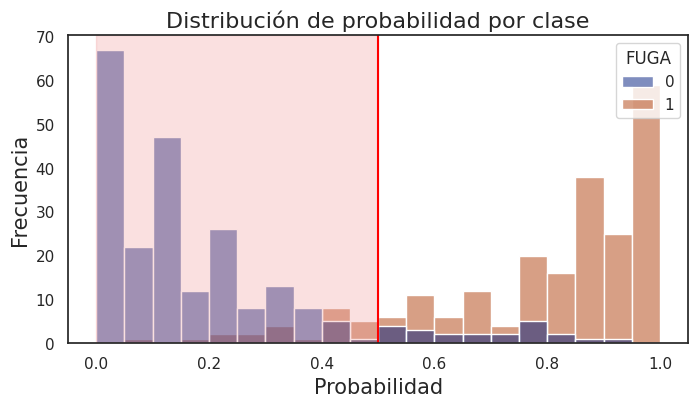

In [ ]:
plt.figure(figsize=(8, 4))
# Probabilidad estimada de FUGA, para ambas poblaciones
ax = sns.histplot(x='SI', hue='FUGA', data = data_test, kde=False, bins=20, palette='dark')
plt.title('Distribución de probabilidad por clase', fontsize=16)
ax.set_xlabel('Probabilidad', fontsize=15)
ax.set_ylabel('Frecuencia', fontsize=15)
# marcar zona en predict = NO
ax.axvline(x=threshold, color='r')
ax.axvspan(0,threshold, color='#EF9A9A', alpha=0.3);

## Curva de costos



In [ ]:
# COSTOS
costo_fp= -100. #se predice que se fuga y no se fugó
costo_fn= -5000 #se predice que no se fuga y se fugó

costo_tp = 1000 #se predice que se fuga y se fugó
costo_tn = 0    #Se predice que no se fuga y no se fugó

In [ ]:
pred_df = pd.DataFrame({
    'pred': rf.predict_proba(X_train)[:, 1],
    'real': y_train
})
pred_df.head(10)

,pred,real
1743,0.172414,0
548,0.310345,0
711,0.965517,1
363,1.000000,1
965,0.103448,0
2247,0.862069,1
1851,0.931034,1
733,0.965517,1
1973,0.034483,0
2080,0.137931,0


In [ ]:
# Sort prediction by score
sorted_predictions = pred_df.sort_values('pred', ascending=False).reset_index(drop=True)
sorted_predictions.head()

,pred,real
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1


In [ ]:
# we define percentiles to measure error
deciles = np.arange(0, 1.1, 0.1) # from 0 to 1 with 0.1 as step
cutoff_point = (deciles*len(sorted_predictions)).astype(int)
cutoff_point

array([   0,  180,  361,  541,  722,  902, 1083, 1263, 1444, 1624, 1805])

In [ ]:
# Iterate for each cutoff point, measure errors and save
costos = []
for c in cutoff_point:
  new_df = sorted_predictions.copy()
  new_df['pred_class'] = np.where(new_df.index <= c, 1, 0)
  tn, fp, fn, tp = confusion_matrix(y_true=new_df['real'], y_pred=new_df['pred_class']).ravel()
  costo = fp * costo_fp + fn * costo_fn
  costos.append(costo)

print('Calculated costs:')
costos

Calculated costs:


[-4500000.0,
 -3600000.0,
 -2695000.0,
 -1795000.0,
 -890000.0,
 -200.0,
 -18300.0,
 -36300.0,
 -54400.0,
 -72400.0,
 -90400.0]

## Análisis Base de datos de Validación.

Carga de datos de validación.

In [ ]:
# manejo de datos
import numpy as np
import pandas as pd

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
# configuracion de seaborn
sns.set(style='white', palette='inferno')

# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# transformación
from sklearn.preprocessing import MinMaxScaler

# metricas
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data VALIDACIÓN
#obs: la separación del archivo csv es con ";"
data_val = pd.read_csv("https://raw.githubusercontent.com/ssantanar/datasets/master/fuga/BASEFUGA_VALIDACION.csv", sep=";")
# contar datos perdidos
print(data_val.isna().sum())
## Se identifican algunos valores perdidos pero no se aprecia una cantidad relevante, en función de la cantidad de registros.
#data.head()

ID                 0
GENERO             4
RENTA             14
EDAD               0
NIV_EDUC          14
E_CIVIL            3
COD_OFI            0
COD_COM            2
CIUDAD             8
D_Marzo            0
D_Abril            0
D_Mayo             0
D_Junio            0
D_Julio            0
D_Agosto           0
D_Septiembre       0
M_MOROSO           2
MONTO              0
SEGURO             8
FUGA            1200
dtype: int64


In [ ]:
data_val.describe().round(2)

,ID,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,FUGA
count,1200.00,1186.00,1200.00,1200.00,1198.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1198.00,1200.00,0.0
mean,2894.50,1191227.94,43.38,69.54,111.65,138817.64,260467.04,98072.32,184505.14,499.24,3184.33,2178.82,1.23,3341250.00,NaN
std,346.55,1880556.88,8.75,39.74,86.45,441616.87,381092.52,658892.38,380148.23,921.33,8092.94,10019.76,0.78,2254035.97,NaN
min,2295.00,72.00,21.00,10.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500000.00,NaN
25%,2594.75,142271.00,38.00,31.00,83.00,0.00,14159.00,0.00,0.00,3.00,0.00,0.00,1.00,1600000.00,NaN
50%,2894.50,517007.50,44.00,60.00,90.00,0.00,122547.00,0.00,17169.00,124.00,0.00,90.50,1.00,2500000.00,NaN
75%,3194.25,1040461.75,50.00,90.00,119.00,0.00,328246.75,0.00,193217.25,607.25,1500.25,572.25,2.00,4500000.00,NaN
max,3494.00,9600000.00,120.00,155.00,516.00,3961350.00,3429083.00,10718684.00,2892126.00,11167.00,82283.00,165348.00,3.00,8000000.00,NaN


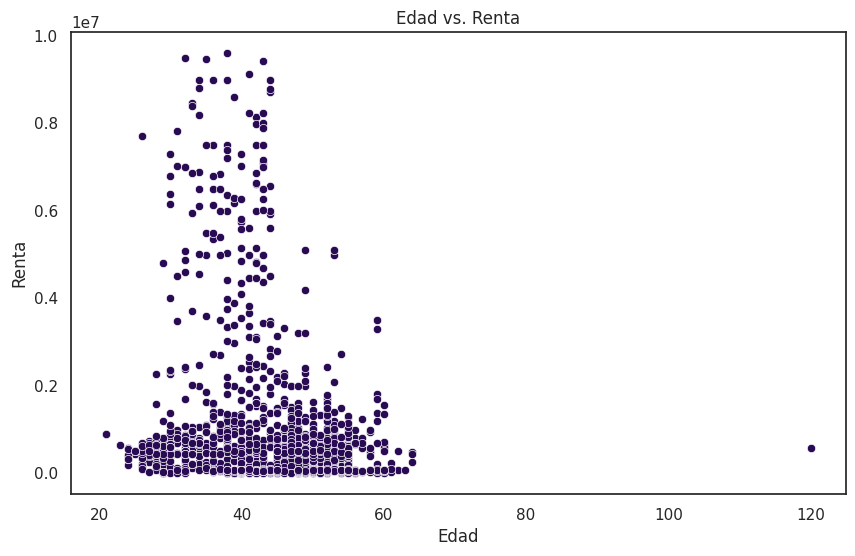

In [ ]:
# Grafico con scatterplot la edad VS renta para todos los registros.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EDAD', y='RENTA', data=data_val)
plt.title('Edad vs. Renta')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.show()

# Se encuentra solo un Outlier de edad.

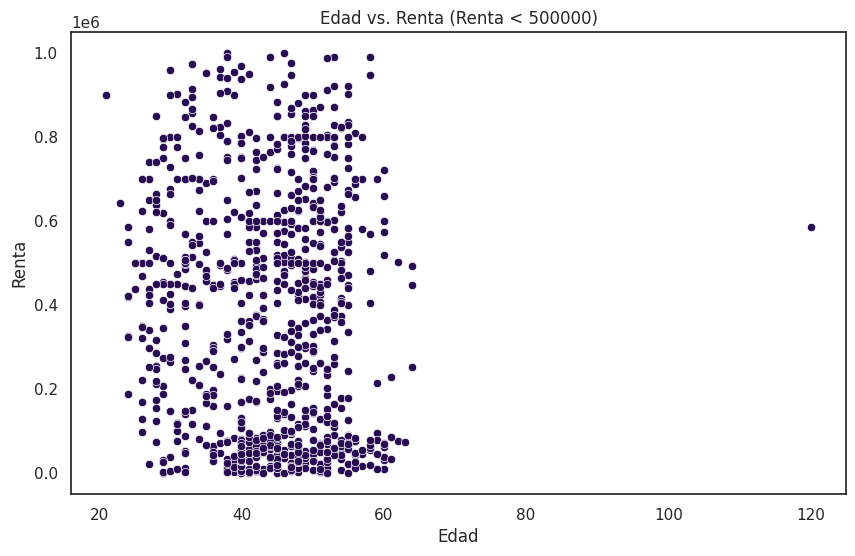

In [ ]:
#Gráfico con scatterplot la edad VS renta < 500000 para todos los registros.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_val' DataFrame is already loaded and preprocessed

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EDAD', y='RENTA', data=data_val[data_val['RENTA'] < 1000000])
plt.title('Edad vs. Renta (Renta < 500000)')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.show()

In [ ]:
data_val.head()


,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,2295,M,457693.0,45,UNV,CAS,31,119.0,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,NO,NaN
1,2296,F,2258382.0,30,TEC,SOL,74,272.0,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,NO,NaN
2,2297,M,546190.0,51,UNV,CAS,138,1.0,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,SI,NaN
3,2298,F,424424.0,41,MED,SOL,138,80.0,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,NO,NaN
4,2299,M,6862726.0,42,MED,CAS,52,91.0,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,NO,NaN


In [ ]:
# Declaramos valores inconsistentes en cada columna
data.loc[data['EDAD'] > 90, 'EDAD'] = np.nan

# Se dejan como NaN las edades inferiores a cero y mayores que 90, basicamente por no contar con clientes sobre 75, definimos un rango adicional para los datos de validación.
# Además se considera como "poco probable" la actividad económica crediticia de clientes sobre esa edad.

# contamos valores perdidos
data_val.isna().sum()

,0
ID,0
GENERO,4
RENTA,14
EDAD,0
NIV_EDUC,14
E_CIVIL,3
COD_OFI,0
COD_COM,2
CIUDAD,8
D_Marzo,0


##Transformacion de variables e imputaciones

In [ ]:
# Reemplazar variables categoricas por numericas.
#data_val['FUGA'] = data_val['FUGA'].replace({'NO FUGA': 0, 'FUGA': 1})
data_val['E_CIVIL'] = data_val['E_CIVIL'].replace({'SOL': 0, 'CAS': 1,'SEP': 2,'VIU': 3})
data_val['NIV_EDUC'] = data_val['NIV_EDUC'].replace({'EUN': 0, 'BAS': 1,'MED': 2, 'TEC': 3,'UNV': 4})
data_val['SEGURO'] = data_val['SEGURO'].replace({'NO': 0, 'SI': 1})
data_val['GENERO'] = data_val['GENERO'].replace({'F': 0, 'M': 1})

<ipython-input-63-4fd479dc93af>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_val['E_CIVIL'] = data_val['E_CIVIL'].replace({'SOL': 0, 'CAS': 1,'SEP': 2,'VIU': 3})
<ipython-input-63-4fd479dc93af>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_val['NIV_EDUC'] = data_val['NIV_EDUC'].replace({'EUN': 0, 'BAS': 1,'MED': 2, 'TEC': 3,'UNV': 4})
<ipython-input-63-4fd479dc93af>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call

In [ ]:
data_val.head()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,2295,1.0,457693.0,45,4.0,1.0,31,119.0,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,0.0,NaN
1,2296,0.0,2258382.0,30,3.0,0.0,74,272.0,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,0.0,NaN
2,2297,1.0,546190.0,51,4.0,1.0,138,1.0,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,1.0,NaN
3,2298,0.0,424424.0,41,2.0,0.0,138,80.0,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,0.0,NaN
4,2299,1.0,6862726.0,42,2.0,1.0,52,91.0,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,0.0,NaN


## Imputaciones

In [ ]:
# Eliminamos data que no aporta al análisis
# En el caso del refistro fuga, se creara nuevamente cuando lo revisemos con el modelo predictivo. Esto nos permitira eliminar valores perdidos.
data_val  = data_val.drop(['ID','CIUDAD','COD_OFI','COD_COM','FUGA'], axis=1)

In [ ]:
#Elimar filas con datos perdidos
print(f"Filas ANTES de la eliminación: {len(data_val)}")
data_val = data_val.dropna ()
print(f"Filas DESPUES de la eliminación: {len(data_val)}")
data_val.isna().sum()

Filas ANTES de la eliminación: 1200
Filas DESPUES de la eliminación: 1155


,0
GENERO,0
RENTA,0
EDAD,0
NIV_EDUC,0
E_CIVIL,0
D_Marzo,0
D_Abril,0
D_Mayo,0
D_Junio,0
D_Julio,0


##Transformación

In [ ]:
data_val['Suma_Mov'] = data_val['D_Marzo'] + data_val['D_Abril'] + data_val['D_Mayo'] + data_val['D_Junio'] + data_val['D_Julio'] + data_val['D_Agosto'] + data_val['D_Septiembre']
data_val['Log_Suma_Mov'] = np.log(data_val['Suma_Mov']+1)

## Modelo predictivo con datos de validación

In [ ]:
data_val.head(3)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,Suma_Mov,Log_Suma_Mov
0,1.0,457693.0,45,4.0,1.0,0,190591,0,20396,0,0,415,1.0,2700000,0.0,211402,12.261522
1,0.0,2258382.0,30,3.0,0.0,0,47354,0,0,0,0,2,0.0,1900000,0.0,47356,10.765470
2,1.0,546190.0,51,4.0,1.0,622808,61646,0,268771,235,2913,0,1.0,1100000,1.0,956373,13.770904


In [ ]:
data.head(3)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,Suma_Mov,Log_Suma_Mov
1095,0,423.0,38.0,3,0,0,20517,0,151125,28,0,0,1,1800000,1,0,171670,12.053335
1019,1,481.0,40.0,4,1,0,166410,0,346418,1649,20491,1181,2,1900000,1,1,536149,13.192169
1403,0,490.0,42.0,2,0,356408,169578,0,64971,434,0,0,1,3800000,1,0,591391,13.290234


In [ ]:
#Reaalizamos la predicción con el modelo entrenado

#Primero veamos qué orden esperaba el modelo

print("Orden esperado de características:", rf.feature_names_in_)

#Reordenar data_val para que coincida con ese orden

data_val = data_val[rf.feature_names_in_]

#Ahora hacer las predicciones

data_val['FUGA'] = rf.predict(data_val)

#Finalmente reemplazamos los valores númericos que fueron cambiados a sus valores originales

data_val['FUGA'] = data_val['FUGA'].replace({1: 'FUGA', 0: 'NO FUGA'})
data_val['E_CIVIL'] = data_val['E_CIVIL'].replace({0: 'SOL', 1: 'CAS',2:'SEP',3:'VIU'})
data_val['NIV_EDUC'] = data_val['NIV_EDUC'].replace({0: 'EUN', 1: 'BAS',2:'MED',3:'TEC',4:'UNV'})
data_val['GENERO'] = data_val['GENERO'].replace({0: 'F', 1: 'M'})
data_val['SEGURO'] = data_val['SEGURO'].replace({0: 'NO', 1: 'SI'})


# Display results
data_val.head()

Orden esperado de características: ['D_Abril' 'D_Agosto' 'D_Julio' 'D_Junio' 'D_Marzo' 'D_Mayo'
 'D_Septiembre' 'EDAD' 'E_CIVIL' 'GENERO' 'Log_Suma_Mov' 'MONTO'
 'M_MOROSO' 'NIV_EDUC' 'RENTA' 'SEGURO' 'Suma_Mov']


<ipython-input-70-5e43b9b3561e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['FUGA'] = rf.predict(data_val)
<ipython-input-70-5e43b9b3561e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['FUGA'] = data_val['FUGA'].replace({1: 'FUGA', 0: 'NO FUGA'})
<ipython-input-70-5e43b9b3561e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,D_Abril,D_Agosto,D_Julio,D_Junio,D_Marzo,D_Mayo,D_Septiembre,EDAD,E_CIVIL,GENERO,Log_Suma_Mov,MONTO,M_MOROSO,NIV_EDUC,RENTA,SEGURO,Suma_Mov,FUGA
0,190591,0,0,20396,0,0,415,45,CAS,M,12.261522,2700000,1.0,UNV,457693.0,NO,211402,FUGA
1,47354,0,0,0,0,0,2,30,SOL,F,10.765470,1900000,0.0,TEC,2258382.0,NO,47356,NO FUGA
2,61646,2913,235,268771,622808,0,0,51,CAS,M,13.770904,1100000,1.0,UNV,546190.0,SI,956373,FUGA
3,1054,0,1961,392871,0,0,1022,41,SOL,F,12.891462,3500000,3.0,MED,424424.0,NO,396908,NO FUGA
4,264308,0,74,87931,0,0,38,42,CAS,M,12.772386,2000000,1.0,MED,6862726.0,NO,352351,FUGA


In [ ]:
#Descargar en excel tabla data_val

from google.colab import files
data_val.to_excel('data_val.xlsx', index=False)
files.download('data_val.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. Conclusiones

En base a los resultados obtenidos, tanto para data como validación, y el contexto de los datos revisados, se decide optar por las siguientes medidas a implementar:

1.- Ofrecer, exclusivamente para quienes presentan una mora, una distribución de la deuda hasta en 6 meses (6 cuotas).
Dado que se observa que la suma de movimientos es, en esencia, creciente en base al nivel de ingreso, por lo que la mora se explicaría, en parte, por una falta de liquidez mensual.
De esta forma se puede distribuir el pago, disminuyendo el costo mensual promedio hasta en 6 meses, otorgando mayor liquidez, y permitiendo que no se opte por la fuga.
Este grupo de una mora es quien tiene mayor probabilidad de fuga.

2.- Renegociación de consolidación de deuda hasta un máximo de 5 años (60 cuotas).
Un plan a mediano-largo plazo, que permita, hasta en 5 años, consolidar la deuda total, de forma tal que permita también, obtener mayor liquidez.
Para universitarios Jóvenes permitiría conseguir recursos de forma tal que pueda financiar su deuda.

3.- Plan de pago en educación en 12 cuotas sin interés.
Dado que el grupo objetivo corresponde a casados hombres, se otorga facilidad de pago en 12 cuotas sin interés para cualquier tipo de estudio, de forma tal que permita retener al cliente y disminuir la probabilidad de fuga con un incentivo específico al público objetivo (hijos, pareja, sobrinos/as se verían beneficiados mientras sea pagado a través del cliente).



*   Dicusiones y principales problemáticas

Para el manejo de la base se encontraron las siguientes problemáticas, las cuales fueron discutidas y consensuadas para la toma de decisión.

1. Valores perdidos en materias sensibles, como género:
Una de las principales problemáticas que encontramos es en la imputación de aquellos valores de la variable género que se encontraban vacíos, puesto que, la opción de "no responde" u "otro" no se encontraba presente, no es posible que como analistas, definamos un género a imputar, por lo que, se eliminaron.

2. Para la base de validación, imputar valores por eliminación, significaría en primera instancia, la eliminación de toda la base de datos, puesto que presenta la columna "fuga" sin ningún valor (es donde debemos posicionar las predicciones), por lo que, entre las distintas opciones que se podían cursar como, eliminarla y volver a agregarla o bien, llenarla de 0 y luego reemplazar en base a la probabilidad asignada a la pertenencia a fuga y no fuga (> o < 0.5).

3. En la identificación del público objetivo, existe una alta concentración de alrredor del 90% de los registros utilizables en 3 regiones, por lo que, independiente de sus clientes internos, opacarían al resto de comunidades por no presentan estas un "n" significativo de análisis, por lo que si el objetivo es maximizar beneficios, se debe optar por las metropolis de la base (arica, santiago, concepción).

4. En torno a la población de no fuga, es decir, quienes se debe aplicar una política común (tasa normal de la entidad, no política de retención), es variable, las mujeres presentan una mayor concentración de no fuga en comparación a los hombres, y a medida que se tienen menores ingresos y menor totalidad de movimientos, la probabilidad de fuga disminuye. La gente jóven de igual forma presenta mayores probabilidades de retención independiente de su género o localidad.




